# PDF Analysis

The following python notebooks aims to analyze the PDF provided by the course instrutor at the following google drive link: https://drive.google.com/drive/folders/13PN8du0gFm8DlTSwLQxKD_75-RZz8Xop  

**We will look at a select few sources of PDF data (countries ranked above Canada according to GII).**

1.   Global Innovation Index 2023 report + General - Get a general overview of inovation factors
  *   wipo-pub-2000-2023-en-main-report-global-innovation-index-2023-16th-edition.pdf
  * roland_berger_trend_compendium_2050_compact_version.pdf
  * GlobalTrends_2040.pdf

2.   Singapore (GII rank 5)

  *   The National Innovation System of Singapore.pdf

3.   Switzerland (GII rank 1)
  * factsheet-innovation-switzerland-s-ge-en-2020_1.pdf

4.   UK (GII rank 4)
  *  uk-innovation-strategy.pdf
  * uk-international-technology-strategy-web-version.pdf
  * uk-science-technology-framework.pdf
  * UK Build Back Better.pdf
  *  evidence-for-innovation-strategy.pdf

5.   USA (GII rank 3)
  * Population2030.pdf
  * US-Gov-National-Standards-Strategy-2023.pdf
  * NDSTS-FINAL-WEB-VERSION.PDF

6. EU (European Union) (many ranked above Canada)
  * EU_strategy.pdf
  * ESPAS_Report2019.pdf

7. Korea (GII rank 10)
  * S2-Korea-s-Digital-Platform-Government.pdf

8. Japan (GII rank 13)
  * Japan_innovation_strategy.pdf

And finally the country of focus to improve:

9. Canada (GII rank 15)
  * New_ISEDC_19-044_INNOVATION-SKILLS_E_web.pdf
  * mitacs_skills_innovation_en.pdf
  * innovation_challenges_report_-_en_final_oct14.pdf
  * budget-2017-en.pdf
  * mitacs_-_joining_the_dots_en.pdf
  * Innovation-for-a-better-Canada.pdf
  * annual-report-2017-2018-eng.pdf
  * bridging_the_gap_en.pdf







Credit for methodology used: https://www.youtube.com/watch?v=cFCGUjc33aU&list=PL8motc6AQftk1Bs42EW45kwYbyJ4jOdiZ&index=22

## The Game plan


<img src="https://dl.dropboxusercontent.com/s/gxij5593tyzrvsg/Screenshot%202023-04-26%20at%203.06.50%20PM.png" alt="vectorstore">


<img src="https://dl.dropboxusercontent.com/s/v1yfuem0i60bd88/Screenshot%202023-04-26%20at%203.52.12%20PM.png" alt="retreiver chain">


In [1]:
!pip -q install langchain openai tiktoken chromadb pypdf sentence_transformers==2.2.2 InstructorEmbedding

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.5/810.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.4/262.4 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.1/286.1 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.1/269.1 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 11.1 MB

In [2]:
!pip show sentence_transformers

Name: sentence-transformers
Version: 2.2.2
Summary: Multilingual text embeddings
Home-page: https://github.com/UKPLab/sentence-transformers
Author: Nils Reimers
Author-email: info@nils-reimers.de
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: huggingface-hub, nltk, numpy, scikit-learn, scipy, sentencepiece, torch, torchvision, tqdm, transformers
Required-by: 


# LangChain multi-doc retriever with ChromaDB


## Setting up LangChain


In [3]:
import os

os.environ["OPENAI_API_KEY"] = ""

In [4]:
from langchain.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.llms import OpenAI
from langchain.chains import RetrievalQA
from langchain.document_loaders import TextLoader
from langchain.document_loaders import PyPDFLoader
from langchain.document_loaders import DirectoryLoader


from InstructorEmbedding import INSTRUCTOR
from langchain.embeddings import HuggingFaceInstructEmbeddings

/usr/local/lib/python3.10/dist-packages/InstructorEmbedding/instructor.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange


In [16]:
from google.colab import drive

# This will prompt for authorization to access your Google Drive
drive.mount('/content/drive')

# Specify the path to your folder containing the PDFs, put a shorcut of profs file on MyDrive
folder_path = '/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/'

Mounted at /content/drive


## HF Instructor Embeddings

In [8]:
from langchain.embeddings import HuggingFaceInstructEmbeddings

instructor_embeddings = HuggingFaceInstructEmbeddings(model_name="hkunlp/instructor-xl",
                                                          model_kwargs={"device": "cuda"})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


.gitattributes:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/270 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.15M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.40k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

load INSTRUCTOR_Transformer
max_seq_length  512


In [9]:
# Embed and store the texts
# Supplying a persist_directory will store the embeddings on disk
persist_directory = 'db1'

## Here is the nmew embeddings being used
embedding = instructor_embeddings

For later use when getting answers:

In [10]:
## Cite sources

import textwrap

def wrap_text_preserve_newlines(text, width=110):
    # Split the input text into lines based on newline characters
    lines = text.split('\n')

    # Wrap each line individually
    wrapped_lines = [textwrap.fill(line, width=width) for line in lines]

    # Join the wrapped lines back together using newline characters
    wrapped_text = '\n'.join(wrapped_lines)

    return wrapped_text

def process_llm_response(llm_response):
    print(wrap_text_preserve_newlines(llm_response['result']))
    print('\n\nSources:')
    for source in llm_response["source_documents"]:
        print(source.metadata['source'])

## GENERAL PDFs




In [11]:
# Use your DirectoryLoader and PyPDFLoader to load the documents
loader = DirectoryLoader(folder_path, glob="*.pdf", loader_cls=PyPDFLoader)

documents_general = loader.load()

# The 'documents' variable should now contain your loaded PDFs.

In [12]:
# Assuming 'documents' is a list of Document objects
unique_sources = {doc.metadata['source'] for doc in documents_general if 'source' in doc.metadata}

# Print the list of unique sources
for source in unique_sources:
    print(source)

/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/roland_berger_trend_compendium_2050_compact_version.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/wipo-pub-2000-2023-en-main-report-global-innovation-index-2023-16th-edition.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/GlobalTrends_2040.pdf


In [13]:
#splitting the text into
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
texts1 = text_splitter.split_documents(documents_general)

In [14]:
persist_directory = 'db1'
vectordb_general = Chroma.from_documents(documents=texts1,
                                 embedding=embedding,
                                 persist_directory=persist_directory)

In [15]:
# persiste the db to disk
vectordb_general.persist()
vectordb_general = None

In [16]:
# Now we can load the persisted database from disk, and use it as normal.
vectordb_general = Chroma(persist_directory=persist_directory,
                  embedding_function=embedding)

In [17]:
retriever_general = vectordb_general.as_retriever()

In [18]:
# create the chain to answer questions
qa_chain_genereal = RetrievalQA.from_chain_type(llm=OpenAI(),
                                  chain_type="stuff",
                                  retriever=retriever_general,
                                  return_source_documents=True)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.llms.openai.OpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  warn_deprecated(


In [110]:
query = "List all the key factors driving innovation then for each of them give me quantifable metrics?"
llm_response = qa_chain_genereal(query)
process_llm_response(llm_response)


1. Economic progress and competitiveness:
- GDP growth rate
- Increase in exports
- Increase in productivity
- Increase in foreign investment

2. Broadening definition of innovation:
- Number of patents filed
- Number of new products or services launched
- Number of new business models implemented
- Number of social innovations

3. Recognition and celebration of innovation in emerging markets:
- Number of innovation awards given out
- Increase in funding for startups in emerging markets
- Number of successful innovations in emerging markets

4. Private sector involvement:
- Percentage of R&D spending by private sector
- Number of collaborations between private sector and research institutions
- Number of new products or services launched by private companies

5. Alignment of intellectual property (IP) policy with innovation policy:
- Number of patents granted
- Number of IP lawsuits filed
- Increase in IP protection laws and enforcement

6. Quantifiable targets and actions in innovati

In [111]:
query = "Provide all keywords realted to Economic progress and competitiveness?"
llm_response = qa_chain_genereal(query)
process_llm_response(llm_response)

 economic progress, competitiveness, economic growth, GDP, productivity, market-driven, trade, market
entrance, technology, technological dominance, geopolitical rivalry, economic policy, advanced economies,
innovation, global economy, job displacement, human development, technology leaders, productivity growth,
market innovation, economic influence, economic challenges, economic cooperation, economic policies, market
competition, technological developments.


Sources:
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/roland_berger_trend_compendium_2050_compact_version.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/GlobalTrends_2040.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/GlobalTrends_2040.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/GlobalTrends_2040.pdf


In [1]:
Economic_progress_and_competitiveness_keywords = [
    "economic progress",
    "competitiveness",
    "economic growth",
    "GDP",
    "productivity",
    "market-driven",
    "trade",
    "market entrance",
    "technology",
    "technological dominance",
    "geopolitical rivalry",
    "economic policy",
    "advanced economies",
    "innovation",
    "global economy",
    "job displacement",
    "human development",
    "technology leaders",
    "productivity growth",
    "market innovation",
    "economic influence",
    "economic challenges",
    "economic cooperation",
    "economic policies",
    "market competition",
    "technological developments"
]


In [112]:
query = "Provide all keywords realted to Broadening definition of innovation?"
llm_response = qa_chain_genereal(query)
process_llm_response(llm_response)


Innovation, new, improved, product, process, combination, previous, users, brought into use, general,
definitions, business activities, types, improvements, outcomes, goods, services, GII, perceived, understood,
evolution, R&D-based, technological, non-R&D, expenditure, low- and middle-income economies, development,
process, investment, intangible assets, firm, global levels, innovation actors, non-profit actors, knowledge
production, collaborative, geographically dispersed, Appendix I, conceptual framework, measurement framework,
rationale, origins, economic progress, competitiveness, growth strategies, general and horizontal, social,
business model, technical aspects, emerging, policymakers, R&D-intensive, closed, internal, localized,
technological breakthroughs, radical, global knowledge frontier, leading and lagging economies, catch-up


Sources:
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/wipo-pub-2000-2023-en-main-report-global-innovation-index-2023-16th-editi

In [2]:
Broadening_definition_of_innovation_keywords = [
    "Innovation", "new", "improved", "product", "process", "combination", "previous", "users",
    "brought into use", "general", "definitions", "business activities", "types", "improvements",
    "outcomes", "goods", "services", "GII", "perceived", "understood", "evolution", "R&D-based",
    "technological", "non-R&D", "expenditure", "low- and middle-income economies", "development",
    "process", "investment", "intangible assets", "firm", "global levels", "innovation actors",
    "non-profit actors", "knowledge production", "collaborative", "geographically dispersed", "Appendix I",
    "conceptual framework", "measurement framework", "rationale", "origins", "economic progress",
    "competitiveness", "growth strategies", "general and horizontal", "social", "business model",
    "technical aspects", "emerging", "policymakers", "R&D-intensive", "closed", "internal", "localized",
    "technological breakthroughs", "radical", "global knowledge frontier", "leading and lagging economies",
    "catch-up"
]


In [113]:
query = "Provide all keywords realted to Recognition and celebration of innovation in emerging markets?"
llm_response = qa_chain_genereal(query)
process_llm_response(llm_response)

 Recognition, celebration, innovation, emerging markets, inspiring, next generation, entrepreneurs,
innovators, GII, decision-makers, database, metrics, policies, workshops, best practice, sub-national
innovation indices, overperformers, middle-income economies, low-income economies, record holders, human
capital, research, creative outputs, perceived, understood, R&D-based technological product innovation,
manufacturing industries, closed, internal, localized, radical, global knowledge frontier, catch-up, unicorn
companies, valuation, Latin American economies, Kavak, Rappi, Uala, innovation leaders, pillars, France,
Japan, Canada, Norway, Iceland, Australia, Georgia, Rwanda, institutions, Trinidad and Tobago.


Sources:
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/wipo-pub-2000-2023-en-main-report-global-innovation-index-2023-16th-edition.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/wipo-pub-2000-2023-en-main-report-global-innovation-index-2023-

In [3]:
innovation_in_emerging_markets_keywords = [
    "Recognition",
    "celebration",
    "innovation",
    "emerging markets",
    "inspiring",
    "next generation",
    "entrepreneurs",
    "innovators",
    "GII",
    "decision-makers",
    "database",
    "metrics",
    "policies",
    "workshops",
    "best practice",
    "sub-national innovation indices",
    "overperformers",
    "middle-income economies",
    "low-income economies",
    "record holders",
    "human capital",
    "research",
    "creative outputs",
    "perceived",
    "understood",
    "R&D-based technological product innovation",
    "manufacturing industries",
    "closed",
    "internal",
    "localized",
    "radical",
    "global knowledge frontier",
    "catch-up",
    "unicorn companies",
    "valuation",
    "Latin American economies",
    "Kavak",
    "Rappi",
    "Uala",
    "innovation leaders",
    "pillars",
    "France",
    "Japan",
    "Canada",
    "Norway",
    "Iceland",
    "Australia",
    "Georgia",
    "Rwanda",
    "institutions",
    "Trinidad and Tobago"
]


In [114]:
query = "Provide all keywords realted to Private sector involvement?"
llm_response = qa_chain_genereal(query)
process_llm_response(llm_response)

 Domestic credit, loans, microfinance institutions, venture capital, market capitalization, trade,
diversification, market scale


Sources:
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/wipo-pub-2000-2023-en-main-report-global-innovation-index-2023-16th-edition.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/wipo-pub-2000-2023-en-main-report-global-innovation-index-2023-16th-edition.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/wipo-pub-2000-2023-en-main-report-global-innovation-index-2023-16th-edition.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/wipo-pub-2000-2023-en-main-report-global-innovation-index-2023-16th-edition.pdf


In [4]:
Private_sector_involvement_keywords = [
    "Domestic credit",
    "loans",
    "microfinance institutions",
    "venture capital",
    "market capitalization",
    "trade",
    "diversification",
    "market scale"
]


In [115]:
query = "Provide all keywords realted to Alignment of intellectual property (IP) policy with innovation policy?"
llm_response = qa_chain_genereal(query)
process_llm_response(llm_response)

 National intellectual property, innovation policy, quantifiable, evaluated, private innovation actors,
government entities, dialogue, cross-ministerial task force, whole of government approach, consults, private
sector, public sector, start-ups, research universities, innovation clusters, commercial purposes, WIPO,
Global Innovation Index, policymaker, diplomat, researcher, investor, innovator, creator, pro-innovation
policymaking, AI, energy, medicine, transport, Member States, innovation-led growth, job creation,
development, opportunities, breakthroughs, discoveries, alignment.


Sources:
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/wipo-pub-2000-2023-en-main-report-global-innovation-index-2023-16th-edition.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/wipo-pub-2000-2023-en-main-report-global-innovation-index-2023-16th-edition.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/wipo-pub-2000-2023-en-main-report-global-innovation

In [5]:
intellectual_property_keywords = [
    "National intellectual property",
    "innovation policy",
    "quantifiable",
    "evaluated",
    "private innovation actors",
    "government entities",
    "dialogue",
    "cross-ministerial task force",
    "whole of government approach",
    "consults",
    "private sector",
    "public sector",
    "start-ups",
    "research universities",
    "innovation clusters",
    "commercial purposes",
    "WIPO",
    "Global Innovation Index",
    "policymaker",
    "diplomat",
    "researcher",
    "investor",
    "innovator",
    "creator",
    "pro-innovation policymaking",
    "AI",
    "energy",
    "medicine",
    "transport",
    "Member States",
    "innovation-led growth",
    "job creation",
    "development",
    "opportunities",
    "breakthroughs",
    "discoveries",
    "alignment"
]

In [118]:
query = "Provide all keywords realted to Quantifiable targets and actions in innovation policy?"
llm_response = qa_chain_genereal(query)
process_llm_response(llm_response)

 Quantifiable targets, actions, innovation policy, measurable, evaluated, GII indicators, R&D expenditure,
number of researchers, Multi-Stakeholder Forum, innovation actors, government entities, innovation systems,
policies, performance changes.


Sources:
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/wipo-pub-2000-2023-en-main-report-global-innovation-index-2023-16th-edition.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/wipo-pub-2000-2023-en-main-report-global-innovation-index-2023-16th-edition.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/wipo-pub-2000-2023-en-main-report-global-innovation-index-2023-16th-edition.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/wipo-pub-2000-2023-en-main-report-global-innovation-index-2023-16th-edition.pdf


In [6]:
quantifiable_innovation_keywords = [
    "Quantifiable targets",
    "actions",
    "innovation policy",
    "measurable",
    "evaluated",
    "GII indicators",
    "R&D expenditure",
    "number of researchers",
    "Multi-Stakeholder Forum",
    "innovation actors",
    "government entities",
    "innovation systems",
    "policies",
    "performance changes"
]


In [120]:
query = "What recommendations do the documents provide for countries to enhance their innovation capabilities and prepare for future trends for each give specific information?"
llm_response = qa_chain_genereal(query)
process_llm_response(llm_response)

 The documents recommend that countries focus on developing their innovation systems and policies, as well as
closely monitoring and measuring their innovation capabilities. They also suggest investing in areas such as
AI, energy, medicine, and transport to prepare for future trends. Additionally, the documents highlight the
importance of addressing country-specific factors, such as policy responses to the COVID-19 pandemic and armed
conflict, in order to accurately evaluate and improve innovation rankings.


Sources:
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/roland_berger_trend_compendium_2050_compact_version.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/wipo-pub-2000-2023-en-main-report-global-innovation-index-2023-16th-edition.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/wipo-pub-2000-2023-en-main-report-global-innovation-index-2023-16th-edition.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/wipo-pub

In [121]:
query = "What specifc policies and programs are recommeded to drive inovation?"
llm_response = qa_chain_genereal(query)
process_llm_response(llm_response)

 Some recommended policies and programs to drive innovation include ensuring innovation is a key priority in a
country's development, establishing a cross-ministerial task force to pursue innovation policy matters, and
consulting with both private and public sector innovation actors. Additionally, using evidence and metrics,
such as those provided by the Global Innovation Index, can also help inform and evaluate innovation policies.


Sources:
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/wipo-pub-2000-2023-en-main-report-global-innovation-index-2023-16th-edition.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/wipo-pub-2000-2023-en-main-report-global-innovation-index-2023-16th-edition.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/wipo-pub-2000-2023-en-main-report-global-innovation-index-2023-16th-edition.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/wipo-pub-2000-2023-en-main-report-global-innovation-index-20

In [20]:
!zip -r db1.zip ./db1

  adding: db1/ (stored 0%)
  adding: db1/chroma.sqlite3 (deflated 46%)
  adding: db1/e3106280-f9a2-4db1-ae9f-9f1eecee8332/ (stored 0%)
  adding: db1/e3106280-f9a2-4db1-ae9f-9f1eecee8332/header.bin (deflated 56%)
  adding: db1/e3106280-f9a2-4db1-ae9f-9f1eecee8332/data_level0.bin (deflated 10%)
  adding: db1/e3106280-f9a2-4db1-ae9f-9f1eecee8332/index_metadata.pickle (deflated 43%)
  adding: db1/e3106280-f9a2-4db1-ae9f-9f1eecee8332/link_lists.bin (deflated 86%)
  adding: db1/e3106280-f9a2-4db1-ae9f-9f1eecee8332/length.bin (deflated 92%)


## Singapore PDFs




In [21]:
# Specify the path to your folder containing the PDFs
folder_path2 = '/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Singapore'

In [22]:
# Use your DirectoryLoader and PyPDFLoader to load the documents
loader = DirectoryLoader(folder_path2, glob="*.pdf", loader_cls=PyPDFLoader)

documents_Singapore = loader.load()

# The 'documents' variable should now contain your loaded PDFs.

In [23]:
# Assuming 'documents' is a list of Document objects
unique_sources = {doc.metadata['source'] for doc in documents_Singapore if 'source' in doc.metadata}

# Print the list of unique sources
for source in unique_sources:
    print(source)

/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Singapore/The National Innovation System of Singapore.pdf


In [24]:
#splitting the text into
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
texts2 = text_splitter.split_documents(documents_Singapore)

In [25]:
persist_directory = 'db2'
vectordb_Singapore = Chroma.from_documents(documents=texts2,
                                 embedding=embedding,
                                 persist_directory=persist_directory)

In [26]:
# persiste the db to disk
vectordb_Singapore.persist()
vectordb_Singapore = None

In [27]:
# Now we can load the persisted database from disk, and use it as normal.
vectordb_Singapore = Chroma(persist_directory=persist_directory,
                  embedding_function=embedding)

In [28]:
retriever_Singapore = vectordb_Singapore.as_retriever()

In [29]:
# create the chain to answer questions
qa_chain_Singapore = RetrievalQA.from_chain_type(llm=OpenAI(),
                                  chain_type="stuff",
                                  retriever=retriever_Singapore,
                                  return_source_documents=True)

In [124]:
query = "List all of the specific strategies and policies have been implemented to foster innovation?"
llm_response = qa_chain_Singapore(query)
process_llm_response(llm_response)

 Some specific strategies and policies that have been implemented in Singapore to foster innovation include:
- The Global Genome Mapping Project
- The ban on new stem cell lines in the U.S.
- Tax incentives and grants for R&D
- A government-backed venture capital fund for technological entrepreneurship
- Increased funding for basic research at universities and research institutions
- National Science and Technology Plans
- Changes in legal institutions governing property rights, intellectual property, high-risk financing, debt
markets, and bankruptcy
- Promotion of skills-upgrading and attraction of foreign talents
- Technopreneurship 21 initiative to foster high-tech startups
- Liberalization of business regulations to support technology diffusion and innovation.


Sources:
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Singapore/The National Innovation System of Singapore.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Singapore/The National Innovat

In [127]:
query = "List all methods for how does this country address common innovation challenges such as funding, human capital development, and research and development (R&D) efficiency?"
llm_response = qa_chain_Singapore(query)
process_llm_response(llm_response)


1. Intensify national R&D spending to achieve 3% of GDP by 2010
2. Identify and invest in strategic areas of R&D
3. Fund a balance of basic and applied research within strategic areas
4. Provide resources and support to encourage private-sector R&D
5. Strengthen linkages between public and private-sector R&D
6. NRF's Competitive Research Program (CRP) funding scheme
7. Development of technology infrastructure
8. Encouragement of private-sector R&D
9. Development of technical manpower to support R&D
10. Collaboration with foreign universities and corporations for R&D joint ventures
11. Identification of key areas for development based on foresight program
12. National Technology Plans with targeted development in key sectors
13. High-level Research Innovation & Enterprise Council (RIEC)
14. National Research Foundation to support R&D initiatives.


Sources:
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Singapore/The National Innovation System of Singapore.pdf
/content/

In [151]:
# using chatgpt user interface at https://chat.openai.com/
Singapore_innovation_strategy_categories = {
    "Economic progress and competitiveness": [
        "Provide resources and support to encourage private-sector R&D",
        "A government-backed venture capital fund for technological entrepreneurship",
        "Intensify national R&D spending to achieve 3% of GDP by 2010",
        "Identification of key areas for development based on foresight program",
        "National Technology Plans with targeted development in key sectors",
        "Encouragement of private-sector R&D"
    ],
    "Broadening definition of innovation": [
        "Development of technical manpower to support R&D",
        "Technopreneurship 21 initiative to foster high-tech startups",
        "Fund a balance of basic and applied research within strategic areas"
    ],
    "Recognition and celebration of innovation in emerging markets": [],
    "Private sector involvement": [
        "Strengthen linkages between public and private-sector R&D",
        "Collaboration with foreign universities and corporations for R&D joint ventures",
        "NRF's Competitive Research Program (CRP) funding scheme"
    ],
    "Alignment of intellectual property (IP) policy with innovation policy": [
        "Changes in legal institutions governing property rights, intellectual property, high-risk financing, debt markets, and bankruptcy"
    ],
    "Quantifiable targets and actions in innovation policy": [
        "Increased funding for basic research at universities and research institutions",
        "National Research Foundation to support R&D initiatives",
        "Promotion of skills-upgrading and attraction of foreign talents",
        "Liberalization of business regulations to support technology diffusion and innovation"
    ]
}


In [30]:
!zip -r db2.zip ./db2

  adding: db2/ (stored 0%)
  adding: db2/chroma.sqlite3 (deflated 58%)
  adding: db2/fc7c2c8c-b7ce-47c2-bf37-fe38d7fe8858/ (stored 0%)
  adding: db2/fc7c2c8c-b7ce-47c2-bf37-fe38d7fe8858/header.bin (deflated 61%)
  adding: db2/fc7c2c8c-b7ce-47c2-bf37-fe38d7fe8858/data_level0.bin (deflated 94%)
  adding: db2/fc7c2c8c-b7ce-47c2-bf37-fe38d7fe8858/link_lists.bin (stored 0%)
  adding: db2/fc7c2c8c-b7ce-47c2-bf37-fe38d7fe8858/length.bin (deflated 39%)


## Switzerland PDFs




In [31]:
# Specify the path to your folder containing the PDFs
folder_path3 = '/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Switzerland/'

In [32]:
# Use your DirectoryLoader and PyPDFLoader to load the documents
loader = DirectoryLoader(folder_path3, glob="*.pdf", loader_cls=PyPDFLoader)

documents_switzerland = loader.load()

# The 'documents' variable should now contain your loaded PDFs.

In [33]:
# Assuming 'documents' is a list of Document objects
unique_sources = {doc.metadata['source'] for doc in documents_switzerland if 'source' in doc.metadata}

# Print the list of unique sources
for source in unique_sources:
    print(source)

/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Switzerland/factsheet-innovation-switzerland-s-ge-en-2020_1.pdf


In [34]:
#splitting the text into
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
texts3 = text_splitter.split_documents(documents_switzerland)

In [35]:
persist_directory = 'db3'
vectordb_swz = Chroma.from_documents(documents=texts3,
                                 embedding=embedding,
                                 persist_directory=persist_directory)

In [36]:
# persiste the db to disk
vectordb_swz.persist()
vectordb_swz = None

In [37]:
# Now we can load the persisted database from disk, and use it as normal.
vectordb_swz = Chroma(persist_directory=persist_directory,
                  embedding_function=embedding)

In [38]:
retriever_swz = vectordb_swz.as_retriever()

In [39]:
# create the chain to answer questions
qa_chain_swz = RetrievalQA.from_chain_type(llm=OpenAI(),
                                  chain_type="stuff",
                                  retriever=retriever_swz,
                                  return_source_documents=True)

In [128]:
query = "List all of the specific strategies and policies have been implemented to foster innovation?"
llm_response = qa_chain_swz(query)
process_llm_response(llm_response)


1. Interdisciplinary cooperation between science and industry
2. Focus on five innovation areas: health and life sciences, mobility and transportation, energy, environment
and natural resources, and computer and computational science
3. Support for cooperation with world-class academic partners
4. Network of high-tech startups and spin-offs
5. Platform for idea exchange and partnering with international R+D teams
6. Industrial liaison officers to expand options for R+D personnel
7. Approximately 200,000 square meters of high-quality laboratory and office space
8. Business-friendly and politically stable environment
9. Access to research funding from Switzerland and the EU
10. High quality of life to attract top talent and their families.


Sources:
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Switzerland/factsheet-innovation-switzerland-s-ge-en-2020_1.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Switzerland/factsheet-innovation-switzerland-s-ge-

In [129]:
query = "List all methods for how does this country address common innovation challenges such as funding, human capital development, and research and development (R&D) efficiency?"
llm_response = qa_chain_swz(query)
process_llm_response(llm_response)


1. Strategic position of Switzerland Innovation in attracting top talent and researchers.
2. Support for cooperation with leading international universities.
3. Network of high-tech startups and spin-offs.
4. Platform for exchange of ideas and partnering with R&D teams of international companies.
5. Industrial liaison officers to expand options for R&D personnel.
6. Availability of high-quality laboratories, offices, and conference rooms for research.
7. Business-friendly and politically stable environment.
8. Access to research funding from Switzerland and the EU.
9. High quality of life to attract top talent and their families.
10. Non-university approach to educating R&D personnel.
11. Strong international involvement in research and patents.
12. Participation in EU research and innovation funding program Horizon 2020.
13. Promotion of cooperation between science and market through Innosuisse.
14. Investment in R&D by Swiss companies.
15. Presence of renowned research institutes.
1

In [152]:
#using chatgpt user interface
switzerland_innovation_categories = {
    "Economic progress and competitiveness": [
        "Focus on five innovation areas: health and life sciences, mobility and transportation, energy, environment and natural resources, and computer and computational science",
        "Business-friendly and politically stable environment",
        "High quality of life to attract top talent and their families",
        "Investment in R&D by Swiss companies"
    ],
    "Broadening definition of innovation": [
        "Interdisciplinary cooperation between science and industry",
        "Non-university approach to educating R&D personnel"
    ],
    "Recognition and celebration of innovation in emerging markets": [
        "Strong international involvement in research and patents",
        "Participation in EU research and innovation funding program Horizon 2020"
    ],
    "Private sector involvement": [
        "Network of high-tech startups and spin-offs",
        "Platform for idea exchange and partnering with international R+D teams",
        "Platform for exchange of ideas and partnering with R&D teams of international companies",
        "Industrial liaison officers to expand options for R&D personnel"
    ],
    "Alignment of intellectual property (IP) policy with innovation policy": [
        "Ideal conditions for intellectual property protection",
        "Availability of specialists in IP management"
    ],
    "Quantifiable targets and actions in innovation policy": [
        "Support for cooperation with world-class academic partners",
        "Support for cooperation with leading international universities",
        "Approximately 200,000 square meters of high-quality laboratory and office space",
        "Access to research funding from Switzerland and the EU",
        "Effective translation of research results into marketable products",
        "Promotion of cooperation between science and market through Innosuisse",
        "Presence of renowned research institutes"
    ]
}


In [40]:
!zip -r db3.zip ./db3

  adding: db3/ (stored 0%)
  adding: db3/chroma.sqlite3 (deflated 74%)
  adding: db3/6361704e-5e05-49ff-bfd0-0e1230e2559b/ (stored 0%)
  adding: db3/6361704e-5e05-49ff-bfd0-0e1230e2559b/header.bin (deflated 61%)
  adding: db3/6361704e-5e05-49ff-bfd0-0e1230e2559b/data_level0.bin (deflated 67%)
  adding: db3/6361704e-5e05-49ff-bfd0-0e1230e2559b/link_lists.bin (stored 0%)
  adding: db3/6361704e-5e05-49ff-bfd0-0e1230e2559b/length.bin (deflated 97%)


## UK PDFs




In [41]:
# Specify the path to your folder containing the PDFs
folder_path4 = '/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/UK/'

In [42]:
# Use your DirectoryLoader and PyPDFLoader to load the documents
loader = DirectoryLoader(folder_path4, glob="*.pdf", loader_cls=PyPDFLoader)

documents_UK = loader.load()

# The 'documents' variable should now contain your loaded PDFs.

In [43]:
# Assuming 'documents' is a list of Document objects
unique_sources = {doc.metadata['source'] for doc in documents_UK if 'source' in doc.metadata}

# Print the list of unique sources
for source in unique_sources:
    print(source)

/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/UK/UK Build Back Better.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/UK/uk-innovation-strategy.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/UK/uk-international-technology-strategy-web-version.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/UK/uk-science-technology-framework.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/UK/evidence-for-innovation-strategy.pdf


In [44]:
#splitting the text into
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
texts4 = text_splitter.split_documents(documents_UK)

In [45]:
persist_directory = 'db4'
vectordb_uk = Chroma.from_documents(documents=texts4,
                                 embedding=embedding,
                                 persist_directory=persist_directory)

In [46]:
# persiste the db to disk
vectordb_uk.persist()
vectordb_uk = None

In [47]:
# Now we can load the persisted database from disk, and use it as normal.
vectordb_uk = Chroma(persist_directory=persist_directory,
                  embedding_function=embedding)

In [48]:
retriever_uk = vectordb_uk.as_retriever()

In [49]:
# create the chain to answer questions
qa_chain_uk = RetrievalQA.from_chain_type(llm=OpenAI(),
                                  chain_type="stuff",
                                  retriever=retriever_uk,
                                  return_source_documents=True)

In [130]:
query = "List all of the specific strategies and policies have been implemented to foster innovation?"
llm_response = qa_chain_uk(query)
process_llm_response(llm_response)

 The specific strategies and policies implemented to foster innovation include the establishment of a Business
Innovation Forum, utilizing the expertise and networks of departmental Chief Scientific Advisers, investing in
people and talent, utilizing mission-based policy, and identifying technological commitments to innovation.
Other initiatives include addressing bottlenecks to innovation, conducting literature reviews and policy
studies, analyzing data, and hosting roundtables with experts, academics, and industry.


Sources:
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/UK/uk-innovation-strategy.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/UK/evidence-for-innovation-strategy.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/UK/evidence-for-innovation-strategy.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/UK/evidence-for-innovation-strategy.pdf


In [131]:
query = "List all methods for how does this country address common innovation challenges such as funding, human capital development, and research and development (R&D) efficiency?"
llm_response = qa_chain_uk(query)
process_llm_response(llm_response)


1. Using diverse range of funding and policy instruments
2. Utilizing competitive research and innovation 'Challenge' funding
3. Leveraging the full machinery of government to coordinate policies
4. Building strong teams to support and coordinate policies
5. Complementing challenge funding with the use of technologies such as AI and genomics
6. Focusing on agile and responsive approaches
7. Investing at risk in portfolios of projects
8. Using less bureaucratic and quicker funding programmes
9. Using a wide range of levers such as regulation and public procurement to drive progress
10. Highlighting the need for national or allied manufacturing and logistic capabilities
11. Realizing the non-monetized benefits of research, development, and innovation
12. Prioritizing a systems-level approach to R&D investment
13. Creating innovation networks and ecosystems
14. Understanding how to ensure research and innovation benefits the economy and society through the Place
Advisory Group
15. Increa

In [153]:
#using chat gpt user interface
uk_innovation_policy_categories = {
    "Economic progress and competitiveness": [
        "Investing in people and talent",
        "Using diverse range of funding and policy instruments",
        "Investing at risk in portfolios of projects",
        "Increasing economic growth by building R&D capacity through targeted investments in places with strong R&D potential",
        "Supporting places to develop and promote effective research, development, and innovation strategies to increase private investment"
    ],
    "Broadening definition of innovation": [
        "Utilizing mission-based policy",
        "Complementing challenge funding with the use of technologies such as AI and genomics",
        "Realizing the non-monetized benefits of research, development, and innovation",
        "Prioritizing a systems-level approach to R&D investment"
    ],
    "Recognition and celebration of innovation in emerging markets": [
        "Creating innovation networks and ecosystems"
    ],
    "Private sector involvement": [
        "Utilizing the expertise and networks of departmental Chief Scientific Advisers",
        "Utilizing competitive research and innovation 'Challenge' funding",
        "Using a wide range of levers such as regulation and public procurement to drive progress"
    ],
    "Alignment of intellectual property (IP) policy with innovation policy": [
        "Identifying technological commitments to innovation"
    ],
    "Quantifiable targets and actions in innovation policy": [
        "Leveraging the full machinery of government to coordinate policies",
        "Building strong teams to support and coordinate policies",
        "Using less bureaucratic and quicker funding programmes",
        "Highlighting the need for national or allied manufacturing and logistic capabilities",
        "Understanding how to ensure research and innovation benefits the economy and society through the Place Advisory Group"
    ]
}


In [50]:
!zip -r db4.zip ./db4

  adding: db4/ (stored 0%)
  adding: db4/chroma.sqlite3 (deflated 45%)
  adding: db4/51696a90-1205-4d46-aaf3-c32b90bbb5fc/ (stored 0%)
  adding: db4/51696a90-1205-4d46-aaf3-c32b90bbb5fc/header.bin (deflated 56%)
  adding: db4/51696a90-1205-4d46-aaf3-c32b90bbb5fc/data_level0.bin (deflated 10%)
  adding: db4/51696a90-1205-4d46-aaf3-c32b90bbb5fc/index_metadata.pickle (deflated 38%)
  adding: db4/51696a90-1205-4d46-aaf3-c32b90bbb5fc/link_lists.bin (deflated 87%)
  adding: db4/51696a90-1205-4d46-aaf3-c32b90bbb5fc/length.bin (deflated 43%)


## USA PDFs




In [51]:
# Specify the path to your folder containing the PDFs
folder_path5 = '/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/USA/'

In [52]:
# Use your DirectoryLoader and PyPDFLoader to load the documents
loader = DirectoryLoader(folder_path5, glob="*.pdf", loader_cls=PyPDFLoader)

documents_US = loader.load()

# The 'documents' variable should now contain your loaded PDFs.

In [53]:
# Assuming 'documents' is a list of Document objects
unique_sources = {doc.metadata['source'] for doc in documents_US if 'source' in doc.metadata}

# Print the list of unique sources
for source in unique_sources:
    print(source)

/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/USA/Population2030.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/USA/US-Gov-National-Standards-Strategy-2023.pdf


In [54]:
#splitting the text into
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
texts5 = text_splitter.split_documents(documents_US)

In [55]:
persist_directory = 'db5'
vectordb_us = Chroma.from_documents(documents=texts5,
                                 embedding=embedding,
                                 persist_directory=persist_directory)

In [56]:
# persiste the db to disk
vectordb_us.persist()
vectordb_us = None

In [57]:
# Now we can load the persisted database from disk, and use it as normal.
vectordb_us = Chroma(persist_directory=persist_directory,
                  embedding_function=embedding)

In [58]:
retriever_us = vectordb_us.as_retriever()

In [59]:
# create the chain to answer questions
qa_chain_us = RetrievalQA.from_chain_type(llm=OpenAI(),
                                  chain_type="stuff",
                                  retriever=retriever_us,
                                  return_source_documents=True)

In [132]:
query = "List all of the specific strategies and policies have been implemented to foster innovation?"
llm_response = qa_chain_us(query)
process_llm_response(llm_response)

 Some specific strategies and policies implemented to foster innovation in this context include: continued
bipartisan support for federal investment in cutting-edge R&D, U.S. investment in pre-standardization research
and analysis, renewing commitment to a rules-based and private sector-led approach to standards development,
supporting the U.S. innovation ecosystem, launching new efforts to increase private and public sector
engagement with standards development organizations (SDOs), promoting shared values and market economies based
on impartial and effective standards, withdrawing policy statements on Standards Essential Patents, and
improving communication between public and private sectors on standards.


Sources:
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/USA/US-Gov-National-Standards-Strategy-2023.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/USA/US-Gov-National-Standards-Strategy-2023.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_

In [154]:
query = "List all methods for how does this country address common innovation challenges such as funding, human capital development, and research and development (R&D) efficiency?"
llm_response = qa_chain_us(query)
process_llm_response(llm_response)


1. Investment in R&D: The U.S. government pursues investment in cutting-edge R&D to support innovation and
advancements in science and technology.

2. Bipartisan support: The U.S. government maintains broad bipartisan support for federal investment in R&D.

3. Pre-standardization research: Greater U.S. investment in pre-standardization research and analysis helps
facilitate contributions to standards-setting discussions.

4. Bolstering support for R&D: The U.S. government will bolster its support for R&D in CET (communications,
engineering, and technology) and further increase investment in pre-standardization research.

5. Increase R&D funding: The administration will work with Congress to increase R&D funding to ensure a strong
foundation for future standards development.

6. Collaboration with Congress: The U.S. government works with Congress to increase funding for CHIPS
(Creating Helpful Incentives to Produce Semiconductors) and Science Act discretionary investments.

7. Free and

In [155]:
# using chatgpt interface
us_innovation_policy_categories = {
    "Economic progress and competitiveness": [
        "Bipartisan support for federal investment in cutting-edge R&D",
        "Supporting the U.S. innovation ecosystem",
        "Free and fair market competition: The U.S. government is committed to free and fair market competition in which the best technologies come to market",
        "Support for scientific research and development, an open investment climate, and the rule of law have been critical for U.S. standards leadership"
    ],
    "Broadening definition of innovation": [
        "Investment in R&D: The U.S. government pursues investment in cutting-edge R&D to support innovation and advancements in science and technology",
        "Bolstering support for R&D: The U.S. government will bolster its support for R&D in CET (communications, engineering, and technology) and further increase investment in pre-standardization research"
    ],
    "Recognition and celebration of innovation in emerging markets": [],
    "Private sector involvement": [
        "Renewing commitment to a rules-based and private sector-led approach to standards development",
        "Launching new efforts to increase private and public sector engagement with standards development organizations (SDOs)"
    ],
    "Alignment of intellectual property (IP) policy with innovation policy": [
        "Withdrawing policy statements on Standards Essential Patents",
        "Improving communication between public and private sectors on standards"
    ],
    "Quantifiable targets and actions in innovation policy": [
        "Increase R&D funding: The administration will work with Congress to increase R&D funding to ensure a strong foundation for future standards development",
        "Collaboration with Congress: The U.S. government works with Congress to increase funding for CHIPS (Creating Helpful Incentives to Produce Semiconductors) and Science Act discretionary investments",
        "Pre-standardization research: Greater U.S. investment in pre-standardization research and analysis helps facilitate contributions to standards-setting discussions"
    ]
}


In [60]:
!zip -r db5.zip ./db5

  adding: db5/ (stored 0%)
  adding: db5/chroma.sqlite3 (deflated 46%)
  adding: db5/e35f1215-84bd-4013-86d7-072086af60fa/ (stored 0%)
  adding: db5/e35f1215-84bd-4013-86d7-072086af60fa/header.bin (deflated 61%)
  adding: db5/e35f1215-84bd-4013-86d7-072086af60fa/data_level0.bin (deflated 100%)
  adding: db5/e35f1215-84bd-4013-86d7-072086af60fa/link_lists.bin (stored 0%)
  adding: db5/e35f1215-84bd-4013-86d7-072086af60fa/length.bin (deflated 42%)


## EU PDFs




In [61]:
# Specify the path to your folder containing the PDFs
folder_path6 = "/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/EU (+UNDP)/"

In [62]:
# Use your DirectoryLoader and PyPDFLoader to load the documents
loader = DirectoryLoader(folder_path6, glob="*.pdf", loader_cls=PyPDFLoader)

documents_EU = loader.load()

# The 'documents' variable should now contain your loaded PDFs.

In [63]:
# Assuming 'documents' is a list of Document objects
unique_sources = {doc.metadata['source'] for doc in documents_EU if 'source' in doc.metadata}

# Print the list of unique sources
for source in unique_sources:
    print(source)

/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/EU (+UNDP)/EU_strategy.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/EU (+UNDP)/ESPAS_Report2019.pdf


In [64]:
#splitting the text into
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
texts6 = text_splitter.split_documents(documents_EU)

In [65]:
persist_directory = 'db6'
vectordb_eu = Chroma.from_documents(documents=texts6,
                                 embedding=embedding,
                                 persist_directory=persist_directory)

In [66]:
# persiste the db to disk
vectordb_eu.persist()
vectordb_eu = None

In [67]:
# Now we can load the persisted database from disk, and use it as normal.
vectordb_eu = Chroma(persist_directory=persist_directory,
                  embedding_function=embedding)

In [68]:
retriever_eu = vectordb_eu.as_retriever()

In [69]:
# create the chain to answer questions
qa_chain_eu = RetrievalQA.from_chain_type(llm=OpenAI(),
                                  chain_type="stuff",
                                  retriever=retriever_eu,
                                  return_source_documents=True)

In [134]:
query = "List all of the specific strategies and policies have been implemented to foster innovation?"
llm_response = qa_chain_eu(query)
process_llm_response(llm_response)



1. Co-designing and co-creating R&I activities and measures with citizens and stakeholders.
2. Convening the yearly European Research & Innovation Days policy forum.
3. Providing Country Specific Recommendations to all Member States as part of the European Semester.
4. Launching the Policy Support Facility 2.0 with a strengthened portfolio of country-specific advice.
5. Developing knowledge and science-based strategies to contribute to a strong and resilient social market
economy.
6. Incentivizing and steering innovation, including social innovation.
7. Facilitating the uptake of new technologies and innovative solutions at the local level.
8. Partnering with the European Union, Member States, and industry to invest in cutting-edge research and
innovation.
9. Reviewing and updating the current local HR strategic plan.
10. Ensuring effective and timely resource allocation.
11. Enhancing the use of technology in daily work.
12. Developing and implementing new and flexible working metho

In [135]:
query = "List all methods for how does this country address common innovation challenges such as funding, human capital development, and research and development (R&D) efficiency?"
llm_response = qa_chain_eu(query)
process_llm_response(llm_response)


1. Investing in research and innovation to address emerging challenges
2. Co-designing and co-creating R&D activities and measures with citizens and stakeholders
3. Convening yearly European Research & Innovation Days to debate and shape the future landscape
4. Partnering with Member States and industry to focus financial resources and skills on cutting-edge projects
5. Using the potential of European Research Area (ERA) for enhancing coordination and coherence of R&D
policies
6. Leveraging the European Semester to coordinate R&D investment and funding towards achieving the Sustainable
Development Goals
7. Applying the innovation principle to encourage innovation and deliver social, environmental, and economic
benefits
8. Promoting effective management of intellectual assets and fast valorization of research results
9. Prioritizing and coordinating European investments in breakthrough technologies, including cybersecurity
and AI
10. Investing in research and innovation to advance know

In [156]:
#using chatgpt user interface
eu_innovation_policy_categories = {
    "Economic progress and competitiveness": [
        "Developing knowledge and science-based strategies to contribute to a strong and resilient social market economy",
        "Incentivizing and steering innovation, including social innovation",
        "Partnering with the European Union, Member States, and industry to invest in cutting-edge research and innovation",
        "Prioritizing and coordinating European investments in breakthrough technologies, including cybersecurity and AI",
        "Investing in research and innovation to advance knowledge and develop new solutions for a digital and industrial revolution in Europe"
    ],
    "Broadening definition of innovation": [
        "Co-designing and co-creating R&I activities and measures with citizens and stakeholders",
        "Facilitating the uptake of new technologies and innovative solutions at the local level",
        "Applying the innovation principle to encourage innovation and deliver social, environmental, and economic benefits"
    ],
    "Recognition and celebration of innovation in emerging markets": [
        "Using the potential of European Research Area (ERA) for enhancing coordination and coherence of R&D policies"
    ],
    "Private sector involvement": [
        "Providing Country Specific Recommendations to all Member States as part of the European Semester",
        "Launching the Policy Support Facility 2.0 with a strengthened portfolio of country-specific advice",
        "Promoting effective management of intellectual assets and fast valorization of research results"
    ],
    "Alignment of intellectual property (IP) policy with innovation policy": [
        "Reviewing and updating the current local HR strategic plan"
    ],
    "Quantifiable targets and actions in innovation policy": [
        "Convening the yearly European Research & Innovation Days policy forum",
        "Ensuring effective and timely resource allocation",
        "Enhancing the use of technology in daily work",
        "Developing and implementing new and flexible working methods",
        "Creating an open, effective, and collaborative working environment",
        "Fostering a culture of trust and empowerment among staff",
        "Providing learning and development opportunities for staff",
        "Leveraging the European Semester to coordinate R&D investment and funding towards achieving the Sustainable Development Goals"
    ]
}


In [70]:
!zip -r db6.zip ./db6

  adding: db6/ (stored 0%)
  adding: db6/chroma.sqlite3 (deflated 44%)
  adding: db6/17a47af7-70b9-472b-90e6-e274a315d681/ (stored 0%)
  adding: db6/17a47af7-70b9-472b-90e6-e274a315d681/header.bin (deflated 61%)
  adding: db6/17a47af7-70b9-472b-90e6-e274a315d681/data_level0.bin (deflated 89%)
  adding: db6/17a47af7-70b9-472b-90e6-e274a315d681/link_lists.bin (stored 0%)
  adding: db6/17a47af7-70b9-472b-90e6-e274a315d681/length.bin (deflated 13%)


## Korea PDFs




In [71]:
# Specify the path to your folder containing the PDFs
folder_path7 = '/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Korea'

In [72]:
# Use your DirectoryLoader and PyPDFLoader to load the documents
loader = DirectoryLoader(folder_path7, glob="*.pdf", loader_cls=PyPDFLoader)

documents_Korea = loader.load()

# The 'documents' variable should now contain your loaded PDFs.

In [73]:
# Assuming 'documents' is a list of Document objects
unique_sources = {doc.metadata['source'] for doc in documents_Korea if 'source' in doc.metadata}

# Print the list of unique sources
for source in unique_sources:
    print(source)

/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Korea/S2-Korea-s-Digital-Platform-Government.pdf


In [74]:
#splitting the text into
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
texts7 = text_splitter.split_documents(documents_Korea)

In [75]:
persist_directory = 'db7'
vectordb_ko = Chroma.from_documents(documents=texts7,
                                 embedding=embedding,
                                 persist_directory=persist_directory)

In [76]:
# persiste the db to disk
vectordb_ko.persist()
vectordb_ko = None

In [77]:
# Now we can load the persisted database from disk, and use it as normal.
vectordb_ko = Chroma(persist_directory=persist_directory,
                  embedding_function=embedding)

In [78]:
retriever_ko = vectordb_ko.as_retriever()

In [79]:
# create the chain to answer questions
qa_chain_ko = RetrievalQA.from_chain_type(llm=OpenAI(),
                                  chain_type="stuff",
                                  retriever=retriever_ko,
                                  return_source_documents=True)

In [138]:
query = "List all of the specific strategies and policies have been implemented to foster innovation?"
llm_response = qa_chain_ko(query)
process_llm_response(llm_response)


- Digital Platform Government
- Proactive & Personalized Services
- Science-based Policy Making
- Innovative Business Development
- Full Opening up of Data and Services
- Government-led Public-Private Collaboration
- AI- and Data-based Approaches
- Digitization
- Cloud Migration & MSA
- My Data // AI Training Data
- Data Infrastructure
- Nagonal Data Strategy
- NaPonal AI IniPaPves
- Smart and DNA Strategy
- Nagonal Mobile Strategy
- Data-driven Policy making and services
- Smart City and Smart Public Services
- Big Data Analytics
- Open Gov Data
- Cloud Services
- Gov Data Center
- 5G & Quantum Communication
- Broadband Internet for Small Villages
- Digital Divide / Digital Support
- Digital Basic Right
- Digitalization
- Data-driven Innovation
- Digital Transformation


Sources:
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Korea/S2-Korea-s-Digital-Platform-Government.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Korea/S2-Korea-s-Digital-Platfor

In [157]:
query = "List all methods for how does this country address common innovation challenges such as funding, human capital development, and research and development (R&D) efficiency?"
llm_response = qa_chain_ko(query)
process_llm_response(llm_response)


1. Development of AI Training Data (691 datasets)
2. Studies of Social Impacts
3. AI-driven use cases and pilot projects
4. Designation as National AI Center
5. Development of national agendas such as broadband Internet, smart city, digital gov, and Data
Infrastructure
6. Drafts of national plannings
7. New Digital Vision (Korea President’s New York Initiatives 2022)
8. Data-driven policy & administration
9. Data sharing through data portal & my data
10. Planning of National Data Infrastructure
11. World’s first commercial 5G service
12. Public Wifi across the country
13. Commercialization of Quantum communication
14. Development of Future Network
15. National Key Data bases (’87-’96)
16. Integrated e-Government (’98- )
17. Smart Government (’14- )
18. Digital New Order and Digital Inclusion
19. New Model of Digital Platform Government
20. Planning of national data centers
21. Cloud migration of all government and public entities
22. National Informatization Committee
23. Strong leade

In [158]:
korea_innovation_policy_categories = {
    "Economic progress and competitiveness": [
        "Innovative Business Development",
        "AI- and Data-based Approaches",
        "Data-driven Innovation",
        "Digital Transformation",
        "Development of AI Training Data",
        "AI-driven use cases and pilot projects",
        "Commercialization of Quantum communication",
        "Development of Future Network"
    ],
    "Broadening definition of innovation": [
        "Digital Platform Government",
        "Proactive & Personalized Services",
        "Science-based Policy Making",
        "Full Opening up of Data and Services",
        "Government-led Public-Private Collaboration",
        "Digitization",
        "Smart City and Smart Public Services",
        "Big Data Analytics",
        "Open Gov Data",
        "Digital Basic Right"
    ],
    "Recognition and celebration of innovation in emerging markets": [
        "Broadband Internet for Small Villages",
        "Digital Divide / Digital Support"
    ],
    "Private sector involvement": [
        "Cloud Migration & MSA",
        "My Data // AI Training Data",
        "Data Infrastructure",
        "NaPonal AI IniPaPves",
        "Data-driven Policy making and services",
        "Cloud Services",
        "Gov Data Center",
        "5G & Quantum Communication"
    ],
    "Alignment of intellectual property (IP) policy with innovation policy": [
        "Nagonal Data Strategy",
        "Smart and DNA Strategy",
        "Nagonal Mobile Strategy"
    ],
    "Quantifiable targets and actions in innovation policy": [
        "Designation as National AI Center",
        "Development of national agendas such as broadband Internet, smart city, digital gov, and Data Infrastructure",
        "Drafts of national plannings",
        "New Digital Vision (Korea President’s New York Initiatives 2022)",
        "Data sharing through data portal & my data",
        "Planning of National Data Infrastructure",
        "World’s first commercial 5G service",
        "Public Wifi across the country",
        "National Key Data bases (’87-’96)",
        "Integrated e-Government (’98- )",
        "Smart Government (’14- )",
        "Digital New Order and Digital Inclusion",
        "New Model of Digital Platform Government",
        "Planning of national data centers",
        "Cloud migration of all government and public entities",
        "National Informatization Committee",
        "Strong leadership from the President",
        "Upgrade to integrated e-Government and services",
        "Two separate governances for e-G"
    ]
}


In [80]:
!zip -r db7.zip ./db7

  adding: db7/ (stored 0%)
  adding: db7/chroma.sqlite3 (deflated 69%)
  adding: db7/217d0449-5aa4-468c-b018-50c3701197aa/ (stored 0%)
  adding: db7/217d0449-5aa4-468c-b018-50c3701197aa/header.bin (deflated 61%)
  adding: db7/217d0449-5aa4-468c-b018-50c3701197aa/data_level0.bin (deflated 100%)
  adding: db7/217d0449-5aa4-468c-b018-50c3701197aa/link_lists.bin (stored 0%)
  adding: db7/217d0449-5aa4-468c-b018-50c3701197aa/length.bin (deflated 51%)


## Japan PDFs




In [81]:
# Specify the path to your folder containing the PDFs
folder_path8 = '/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Japan'

In [82]:
# Use your DirectoryLoader and PyPDFLoader to load the documents
loader = DirectoryLoader(folder_path8, glob="*.pdf", loader_cls=PyPDFLoader)

documents_Japan = loader.load()

# The 'documents' variable should now contain your loaded PDFs.

In [83]:
# Assuming 'documents' is a list of Document objects
unique_sources = {doc.metadata['source'] for doc in documents_Japan if 'source' in doc.metadata}

# Print the list of unique sources
for source in unique_sources:
    print(source)

/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Japan/Japan_innovation_strategy.pdf


In [84]:
#splitting the text into
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
texts8 = text_splitter.split_documents(documents_Japan)

In [85]:
persist_directory = 'db8'
vectordb_jp = Chroma.from_documents(documents=texts8,
                                 embedding=embedding,
                                 persist_directory=persist_directory)

In [86]:
# persiste the db to disk
vectordb_jp.persist()
vectordb_jp = None

In [87]:
# Now we can load the persisted database from disk, and use it as normal.
vectordb_jp = Chroma(persist_directory=persist_directory,
                  embedding_function=embedding)

In [88]:
retriever_jp = vectordb_jp.as_retriever()

In [89]:
# create the chain to answer questions
qa_chain_jp = RetrievalQA.from_chain_type(llm=OpenAI(),
                                  chain_type="stuff",
                                  retriever=retriever_jp,
                                  return_source_documents=True)

In [141]:
query = "List all of the specific strategies and policies have been implemented to foster innovation?"
llm_response = qa_chain_jp(query)
process_llm_response(llm_response)


1. Creation of an innovation ecosystem through initiatives for the advancement of the venture capital market
and public-private R&D investment.
2. Utilization of a 10-trillion-yen University Endowment Fund to support world-class research universities and
foster talented individuals.
3. Strengthening research capabilities and developing human resources.
4. Incentives such as R&D tax incentives and the Japanese SBIR program.
5. Launch of programs to provide support for development of cutting-edge technologies.
6. Bold investment in advanced science and technology.
7. Integration of policies to enhance overall policy integration and create new value.
8. Utilization of advanced technologies to achieve economic growth and solve social issues.
9. Collaboration with other nations and drawing focused investment from the public and private sectors.
10. Long-term support for research universities and talented individuals to generate outstanding results.


Sources:
/content/drive/My Drive/MIE162

In [142]:
query = "List all methods for how does this country address common innovation challenges such as funding, human capital development, and research and development (R&D) efficiency?"
llm_response = qa_chain_jp(query)
process_llm_response(llm_response)

 Japan has set a goal of reaching achieving this goal through:
1. Utilizing a 10-trillion-yen University Endowment Fund to provide long-term support for world-class research
universities and fostering talented individuals
2. Strengthening research capabilities and developing human resources
3. Promoting the utilization of cutting-edge technologies
4. Launching programs for powerful support and making bold investments in advanced science and technology
5. Investing 120 trillion yen in R&D over the next five years
6. Creating an innovation ecosystem through initiatives for the advancement of the venture capital market and
expanding public-private R&D investment
7. Providing incentives for R&D through tax incentives and the Japanese SBIR program
8. Enhancing overall policy integration for new value creation.


Sources:
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Japan/Japan_innovation_strategy.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Japan/Japa

In [160]:
japan_innovation_policy_categories = {
    "Economic progress and competitiveness": [
        "Creation of an innovation ecosystem through initiatives for the advancement of the venture capital market and public-private R&D investment",
        "Utilization of a 10-trillion-yen University Endowment Fund to support world-class research universities and foster talented individuals",
        "Bold investment in advanced science and technology",
        "Investing 120 trillion yen in R&D over the next five years",
        "Utilization of advanced technologies to achieve economic growth and solve social issues"
    ],
    "Broadening definition of innovation": [
        "Integration of policies to enhance overall policy integration and create new value",
        "Promoting the utilization of cutting-edge technologies",
        "Launching programs to provide support for development of cutting-edge technologies"
    ],
    "Recognition and celebration of innovation in emerging markets": [],
    "Private sector involvement": [
        "Incentives such as R&D tax incentives and the Japanese SBIR program"
    ],
    "Alignment of intellectual property (IP) policy with innovation policy": [],
    "Quantifiable targets and actions in innovation policy": [
        "Strengthening research capabilities and developing human resources",
        "Collaboration with other nations and drawing focused investment from the public and private sectors",
        "Long-term support for research universities and talented individuals to generate outstanding results",
        "Enhancing overall policy integration for new value creation"
    ]
}


In [90]:
!zip -r db8.zip ./db8

  adding: db8/ (stored 0%)
  adding: db8/chroma.sqlite3 (deflated 75%)
  adding: db8/ef5517b4-638f-4c2c-a302-32d625530e7c/ (stored 0%)
  adding: db8/ef5517b4-638f-4c2c-a302-32d625530e7c/header.bin (deflated 61%)
  adding: db8/ef5517b4-638f-4c2c-a302-32d625530e7c/data_level0.bin (deflated 100%)
  adding: db8/ef5517b4-638f-4c2c-a302-32d625530e7c/link_lists.bin (stored 0%)
  adding: db8/ef5517b4-638f-4c2c-a302-32d625530e7c/length.bin (deflated 39%)


## CANADA PDFs




In [91]:
# Specify the path to your folder containing the PDFs
folder_path9 = '/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada'

In [92]:
# Use your DirectoryLoader and PyPDFLoader to load the documents
loader = DirectoryLoader(folder_path9, glob="*.pdf", loader_cls=PyPDFLoader)

documents_canada = loader.load()

# The 'documents' variable should now contain your loaded PDFs.

In [93]:
# Assuming 'documents' is a list of Document objects
unique_sources = {doc.metadata['source'] for doc in documents_canada if 'source' in doc.metadata}

# Print the list of unique sources
for source in unique_sources:
    print(source)

/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/Innovation-for-a-better-Canada.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/innovation_challenges_report_-_en_final_oct14.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/mitacs_-_joining_the_dots_en.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/mitacs_skills_innovation_en.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/annual-report-2017-2018-eng.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/New_ISEDC_19-044_INNOVATION-SKILLS_E_web.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/budget-2017-en.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/bridging_the_gap_en.pdf


In [94]:
#splitting the text into
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
texts9 = text_splitter.split_documents(documents_canada)

In [95]:
persist_directory = 'db9'
vectordb_can = Chroma.from_documents(documents=texts9,
                                 embedding=embedding,
                                 persist_directory=persist_directory)

In [96]:
# persiste the db to disk
vectordb_can.persist()
vectordb_can = None

In [97]:
# Now we can load the persisted database from disk, and use it as normal.
vectordb_can = Chroma(persist_directory=persist_directory,
                  embedding_function=embedding)

In [98]:
retriever_can = vectordb_can.as_retriever()

In [99]:
# create the chain to answer questions
qa_chain_can = RetrievalQA.from_chain_type(llm=OpenAI(),
                                  chain_type="stuff",
                                  retriever=retriever_can,
                                  return_source_documents=True)

In [159]:
query = "List all of the specific strategies and policies have been implemented to foster innovation?"
llm_response = qa_chain_can(query)
process_llm_response(llm_response)


1. Agile regulations
2. Skills and talent
3. Technology adoption
4. Infrastructure (digital and physical)
5. Own the podium
6. Canada Brand
7. Innovation and Skills Plan
8. Partnership-driven approach
9. Economic Strategy Tables
10. Advisory Council on Economic Growth
11. Fundamental Science Review
12. Intellectual Property Strategy
13. Venture Capital Catalyst Initiative
14. Industry-led, sector-specific tables
15. Implementation of recommendations from tables
16. 2018 Fall Economic Statement
17. Government engagement with Canadians and Canadian businesses.


Sources:
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/New_ISEDC_19-044_INNOVATION-SKILLS_E_web.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/New_ISEDC_19-044_INNOVATION-SKILLS_E_web.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/New_ISEDC_19-044_INNOVATION-SKILLS_E_web.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/New_ISED

In [144]:
query = "List all methods for how does this country address common innovation challenges such as funding, human capital development, and research and development (R&D) efficiency?"
llm_response = qa_chain_can(query)
process_llm_response(llm_response)


1. Investing in science, research, and development through government and post-secondary institutions
2. Encouraging businesses to invest in innovation
3. Delivering business innovation programs in simpler, more efficient, and coordinated ways
4. Removing administrative barriers to R&D collaboration
5. Providing innovation support to Canadian entrepreneurs, global companies, and global investors
6. Building networks and fostering collaboration with innovators in industry and academia
7. Issuing grand challenges to teams of researchers to address pressing economic and societal problems
8. Supporting the development of new materials for clean and sustainable energy sources
9. Taking an innovative approach to solving difficult public policy challenges
10. Opening up problem-solving processes to Canadian and global innovators
11. Working with private sector, non-profit, and academic innovators to find solutions to big challenges
12. Launching challenges through Innovative Solutions Canada

In [170]:
canada_innovation_policy_categories = {
    "Economic progress and competitiveness": [
        "Investing in science, research, and development through government and post-secondary institutions",
        "Encouraging businesses to invest in innovation",
        "Innovation and Skills Plan",
        "Economic Strategy Tables",
        "Advisory Council on Economic Growth",
        "Fundamental Science Review",
        "Intellectual Property Strategy",
        "Venture Capital Catalyst Initiative",
        "Industry-led, sector-specific tables",
        "Implementation of recommendations from tables",
        "2018 Fall Economic Statement"
    ],
    "Broadening definition of innovation": [
        "Agile regulations",
        "Technology adoption",
        "Own the podium",
        "Canada Brand",
        "Partnership-driven approach"
    ],
    "Recognition and celebration of innovation in emerging markets": [],
    "Private sector involvement": [
        "Removing administrative barriers to R&D collaboration",
        "Building networks and fostering collaboration with innovators in industry and academia",
        "Issuing grand challenges to teams of researchers to address pressing economic and societal problems",
        "Supporting the development of new materials for clean and sustainable energy sources",
        "Launching challenges through Innovative Solutions Canada to help Canadian firms generate and leverage new intellectual property (IP)",
        "Encouraging procurement from companies led by underrepresented groups"
    ],
    "Alignment of intellectual property (IP) policy with innovation policy": [
        "Taking an innovative approach to solving difficult public policy challenges",
        "Opening up problem-solving processes to Canadian and global innovators",
        "Working with private sector, non-profit, and academic innovators to find solutions to big challenges"
    ],
    "Quantifiable targets and actions in innovation policy": [
        "Skills and talent",
        "Infrastructure (digital and physical)",
        "Delivering business innovation programs in simpler, more efficient, and coordinated ways",
        "Providing innovation support to Canadian entrepreneurs, global companies, and global investors",
        "Providing first-customer opportunities for new innovations through government challenges",
        "Government engagement with Canadians and Canadian businesses"
    ]
}


In [145]:
query = "What are the key components of Canada’s current innovation ecosystem?"
llm_response = qa_chain_can(query)
process_llm_response(llm_response)


 The key components of Canada's current innovation ecosystem include ensuring businesses have the right
pipeline of talent, investing in the next generation of Canadian research and researchers, building innovation
ecosystems through partnerships and shared risk taking, bridging the gap from idea to commercialization, and
targeting investments at all points along the innovation continuum.


Sources:
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/New_ISEDC_19-044_INNOVATION-SKILLS_E_web.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/New_ISEDC_19-044_INNOVATION-SKILLS_E_web.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/New_ISEDC_19-044_INNOVATION-SKILLS_E_web.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/New_ISEDC_19-044_INNOVATION-SKILLS_E_web.pdf


In [146]:
query = "Which challenges and weaknesses in Canada’s innovation ecosystem are highlighted in these reports?"
llm_response = qa_chain_can(query)
process_llm_response(llm_response)

 Some of the challenges and weaknesses highlighted in these reports include Canada's lagging innovation
performance compared to global peers, waning business investment in research and development, struggles to
scale high-potential firms, weak adoption of productivity-enhancing technologies, and limited engagement in
global value chains. Additionally, there are barriers for women and Indigenous entrepreneurs in starting and
growing their businesses, and Canadian business investment in research has decreased. There is also a need for
more partnerships between businesses and researchers to drive innovation and commercialization.


Sources:
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/mitacs_skills_innovation_en.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/New_ISEDC_19-044_INNOVATION-SKILLS_E_web.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/New_ISEDC_19-044_INNOVATION-SKILLS_E_web.pdf
/content/drive/My Driv

In [161]:
canada_innovation_challenges = {
    "Economic progress and competitiveness": [
        "Canada's lagging innovation performance compared to global peers",
        "Waning business investment in research and development",
        "Struggles to scale high-potential firms",
        "Weak adoption of productivity-enhancing technologies",
        "Limited engagement in global value chains",
        "Canadian business investment in research has decreased"
    ],
    "Broadening definition of innovation": [],
    "Recognition and celebration of innovation in emerging markets": [
        "Barriers for women and Indigenous entrepreneurs in starting and growing their businesses"
    ],
    "Private sector involvement": [
        "Need for more partnerships between businesses and researchers to drive innovation and commercialization"
    ],
    "Alignment of intellectual property (IP) policy with innovation policy": [],
    "Quantifiable targets and actions in innovation policy": []
}


In [147]:
query = "What are potential new areas of opportunity for Canada to strengthen its innovation ecosystem?"
llm_response = qa_chain_can(query)
process_llm_response(llm_response)



Some potential new areas of opportunity for Canada to strengthen its innovation ecosystem mentioned in the
context include advanced manufacturing, agri-food, clean technology, digital industries, health/bio-sciences,
and clean resources. These areas were identified as part of the Economic Strategy Tables that will guide the
government's efforts to provide relevant and effective programs for Canadian innovators. The context also
mentions the development of world-class, large-scale innovation ecosystems, partnerships and collaborations,
and embracing Canada's diversity to foster participation of traditionally underrepresented groups in the
innovation economy.


Sources:
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/New_ISEDC_19-044_INNOVATION-SKILLS_E_web.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/budget-2017-en.pdf
/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/New_ISEDC_19-044_INNOVATION-SKILLS_E_web.pdf
/c

In [162]:
canada_innovation_opportunities = {
    "Economic progress and competitiveness": [
        "Advanced manufacturing",
        "Agri-food",
        "Clean technology",
        "Digital industries",
        "Health/bio-sciences",
        "Clean resources"
    ],
    "Broadening definition of innovation": [
        "Development of world-class, large-scale innovation ecosystems"
    ],
    "Recognition and celebration of innovation in emerging markets": [],
    "Private sector involvement": [
        "Partnerships and collaborations"
    ],
    "Alignment of intellectual property (IP) policy with innovation policy": [],
    "Quantifiable targets and actions in innovation policy": [
        "Embracing Canada's diversity to foster participation of traditionally underrepresented groups in the innovation economy"
    ]
}


In [100]:
!zip -r db9.zip ./db9

  adding: db9/ (stored 0%)
  adding: db9/79897976-5a83-40e4-90e9-3402a93c82de/ (stored 0%)
  adding: db9/79897976-5a83-40e4-90e9-3402a93c82de/header.bin (deflated 57%)
  adding: db9/79897976-5a83-40e4-90e9-3402a93c82de/data_level0.bin (deflated 10%)
  adding: db9/79897976-5a83-40e4-90e9-3402a93c82de/index_metadata.pickle (deflated 38%)
  adding: db9/79897976-5a83-40e4-90e9-3402a93c82de/link_lists.bin (deflated 87%)
  adding: db9/79897976-5a83-40e4-90e9-3402a93c82de/length.bin (deflated 64%)
  adding: db9/chroma.sqlite3 (deflated 42%)


#Economic_progress_and_competitiveness_keywords

In [171]:
keywords_to_add_check1 = Singapore_innovation_strategy_categories ["Economic progress and competitiveness"] + switzerland_innovation_categories ["Economic progress and competitiveness"] + uk_innovation_policy_categories ["Economic progress and competitiveness"] + us_innovation_policy_categories ["Economic progress and competitiveness"] + eu_innovation_policy_categories ["Economic progress and competitiveness"] + korea_innovation_policy_categories ["Economic progress and competitiveness"] + japan_innovation_policy_categories ["Economic progress and competitiveness"] + canada_innovation_policy_categories ["Economic progress and competitiveness"]


In [174]:
keywords_to_add_check1

['Provide resources and support to encourage private-sector R&D',
 'A government-backed venture capital fund for technological entrepreneurship',
 'Intensify national R&D spending to achieve 3% of GDP by 2010',
 'Identification of key areas for development based on foresight program',
 'National Technology Plans with targeted development in key sectors',
 'Encouragement of private-sector R&D',
 'Focus on five innovation areas: health and life sciences, mobility and transportation, energy, environment and natural resources, and computer and computational science',
 'Business-friendly and politically stable environment',
 'High quality of life to attract top talent and their families',
 'Investment in R&D by Swiss companies',
 'Investing in people and talent',
 'Using diverse range of funding and policy instruments',
 'Investing at risk in portfolios of projects',
 'Increasing economic growth by building R&D capacity through targeted investments in places with strong R&D potential',
 'Su

In [173]:
Economic_progress_and_competitiveness_keywords

['economic progress',
 'competitiveness',
 'economic growth',
 'GDP',
 'productivity',
 'market-driven',
 'trade',
 'market entrance',
 'technology',
 'technological dominance',
 'geopolitical rivalry',
 'economic policy',
 'advanced economies',
 'innovation',
 'global economy',
 'job displacement',
 'human development',
 'technology leaders',
 'productivity growth',
 'market innovation',
 'economic influence',
 'economic challenges',
 'economic cooperation',
 'economic policies',
 'market competition',
 'technological developments']

In [8]:
Economic_progress_and_competitiveness_keywords = [
    "economic progress",
    "gdp",
    "economic growth",
    "competitiveness",
    "technology",
    "technological dominance",
    "market driven",
    "global economy",
    "innovation",
    "economic policy",
    "productivity",
    "market innovation",
    "technological developments",
    "economic cooperation",
    "trade",
    "market entrance",
    "market competition",
    "technology leaders",
    "economic challenges",
    "human development",
    "job displacement",
    "economic influence",
    "growth",
    "investment"
]

#Broadening_definition_of_innovation_keywords

In [176]:
keywords_to_add_check2 = (
    Singapore_innovation_strategy_categories["Broadening definition of innovation"] +
    switzerland_innovation_categories["Broadening definition of innovation"] +
    uk_innovation_policy_categories["Broadening definition of innovation"] +
    us_innovation_policy_categories["Broadening definition of innovation"] +
    eu_innovation_policy_categories["Broadening definition of innovation"] +
    korea_innovation_policy_categories["Broadening definition of innovation"] +
    japan_innovation_policy_categories["Broadening definition of innovation"] +
    canada_innovation_policy_categories["Broadening definition of innovation"]
)


In [177]:
keywords_to_add_check2

['Development of technical manpower to support R&D',
 'Technopreneurship 21 initiative to foster high-tech startups',
 'Fund a balance of basic and applied research within strategic areas',
 'Interdisciplinary cooperation between science and industry',
 'Non-university approach to educating R&D personnel',
 'Utilizing mission-based policy',
 'Complementing challenge funding with the use of technologies such as AI and genomics',
 'Realizing the non-monetized benefits of research, development, and innovation',
 'Prioritizing a systems-level approach to R&D investment',
 'Investment in R&D: The U.S. government pursues investment in cutting-edge R&D to support innovation and advancements in science and technology',
 'Bolstering support for R&D: The U.S. government will bolster its support for R&D in CET (communications, engineering, and technology) and further increase investment in pre-standardization research',
 'Co-designing and co-creating R&I activities and measures with citizens and 

In [178]:
Broadening_definition_of_innovation_keywords

['Innovation',
 'new',
 'improved',
 'product',
 'process',
 'combination',
 'previous',
 'users',
 'brought into use',
 'general',
 'definitions',
 'business activities',
 'types',
 'improvements',
 'outcomes',
 'goods',
 'services',
 'GII',
 'perceived',
 'understood',
 'evolution',
 'R&D-based',
 'technological',
 'non-R&D',
 'expenditure',
 'low- and middle-income economies',
 'development',
 'process',
 'investment',
 'intangible assets',
 'firm',
 'global levels',
 'innovation actors',
 'non-profit actors',
 'knowledge production',
 'collaborative',
 'geographically dispersed',
 'Appendix I',
 'conceptual framework',
 'measurement framework',
 'rationale',
 'origins',
 'economic progress',
 'competitiveness',
 'growth strategies',
 'general and horizontal',
 'social',
 'business model',
 'technical aspects',
 'emerging',
 'policymakers',
 'R&D-intensive',
 'closed',
 'internal',
 'localized',
 'technological breakthroughs',
 'radical',
 'global knowledge frontier',
 'leading and 

In [9]:
Broadening_definition_of_innovation_keywords = [
    'innovation',
    'new',
    'improved',
    'product',
    'process',
    'combination',
    'previous',
    'improvements',
    'evolution',
    'r&d based',
    'technological',
    'development',
    'process',
    'investment',
    'intangible assets',
    'innovation actors',
    'non-profit actors',
    'knowledge production',
    'collaborative',
    'geographically dispersed',
    'growth strategies',
    'policymakers',
    'r&d intensive',
    'technological breakthroughs',
    'global knowledge frontier',
    'technical manpower',
    'technopreneurship',
    'funding',
    'benefits',
    'public private collaboration',
    'digitization',
    'agile regulations',
    'technology adoption',
    'partnership'
]


#innovation_in_emerging_markets_keywords

In [181]:
keywords_to_add_recognition_emerging_markets = (
    Singapore_innovation_strategy_categories["Recognition and celebration of innovation in emerging markets"] +
    switzerland_innovation_categories["Recognition and celebration of innovation in emerging markets"] +
    uk_innovation_policy_categories["Recognition and celebration of innovation in emerging markets"] +
    us_innovation_policy_categories["Recognition and celebration of innovation in emerging markets"] +
    eu_innovation_policy_categories["Recognition and celebration of innovation in emerging markets"] +
    korea_innovation_policy_categories["Recognition and celebration of innovation in emerging markets"] +
    japan_innovation_policy_categories["Recognition and celebration of innovation in emerging markets"] +
    canada_innovation_policy_categories["Recognition and celebration of innovation in emerging markets"]
)


In [185]:
keywords_to_add_recognition_emerging_markets

['Strong international involvement in research and patents',
 'Participation in EU research and innovation funding program Horizon 2020',
 'Creating innovation networks and ecosystems',
 'Using the potential of European Research Area (ERA) for enhancing coordination and coherence of R&D policies',
 'Broadband Internet for Small Villages',
 'Digital Divide / Digital Support']

In [189]:
innovation_in_emerging_markets_keywords

['Recognition',
 'celebration',
 'innovation',
 'emerging markets',
 'inspiring',
 'next generation',
 'entrepreneurs',
 'innovators',
 'GII',
 'decision-makers',
 'database',
 'metrics',
 'policies',
 'workshops',
 'best practice',
 'sub-national innovation indices',
 'overperformers',
 'middle-income economies',
 'low-income economies',
 'record holders',
 'human capital',
 'research',
 'creative outputs',
 'perceived',
 'understood',
 'R&D-based technological product innovation',
 'manufacturing industries',
 'closed',
 'internal',
 'localized',
 'radical',
 'global knowledge frontier',
 'catch-up',
 'unicorn companies',
 'valuation',
 'Latin American economies',
 'Kavak',
 'Rappi',
 'Uala',
 'innovation leaders',
 'pillars',
 'France',
 'Japan',
 'Canada',
 'Norway',
 'Iceland',
 'Australia',
 'Georgia',
 'Rwanda',
 'institutions',
 'Trinidad and Tobago']

In [10]:
innovation_in_emerging_markets_keywords = [
    'recognition',
    'celebration',
    'innovation',
    'emerging markets',
    'inspiring',
    'next generation',
    'entrepreneurs',
    'innovators',
    'decision makers',
    'database',
    'metrics',
    'policies',
    'workshops',
    'best practice',
    'overperformers',
    'record holders',
    'human capital',
    'research',
    'creative outputs',
    'manufacturing industries',
    'localized',
    'global knowledge frontier',
    'catch up',
    'unicorn companies',
    'valuation',
    'innovation leaders',
    'international involvement',
    'research',
    'patents',
    'innovation networks',
    'ecosystems',
    'coordination',
    'coherence',
    'r&d policies',
    'broadband internet',
    'small villages',
    'diital divide',
    'digital support'
]


# Private_sector_involvement_keywords

In [182]:
keywords_to_add_private_sector_involvement = (
    Singapore_innovation_strategy_categories["Private sector involvement"] +
    switzerland_innovation_categories["Private sector involvement"] +
    uk_innovation_policy_categories["Private sector involvement"] +
    us_innovation_policy_categories["Private sector involvement"] +
    eu_innovation_policy_categories["Private sector involvement"] +
    korea_innovation_policy_categories["Private sector involvement"] +
    japan_innovation_policy_categories["Private sector involvement"] +
    canada_innovation_policy_categories["Private sector involvement"]
)


In [186]:
keywords_to_add_private_sector_involvement

['Strengthen linkages between public and private-sector R&D',
 'Collaboration with foreign universities and corporations for R&D joint ventures',
 "NRF's Competitive Research Program (CRP) funding scheme",
 'Network of high-tech startups and spin-offs',
 'Platform for idea exchange and partnering with international R+D teams',
 'Platform for exchange of ideas and partnering with R&D teams of international companies',
 'Industrial liaison officers to expand options for R&D personnel',
 'Utilizing the expertise and networks of departmental Chief Scientific Advisers',
 "Utilizing competitive research and innovation 'Challenge' funding",
 'Using a wide range of levers such as regulation and public procurement to drive progress',
 'Renewing commitment to a rules-based and private sector-led approach to standards development',
 'Launching new efforts to increase private and public sector engagement with standards development organizations (SDOs)',
 'Providing Country Specific Recommendations

In [190]:
Private_sector_involvement_keywords

['Domestic credit',
 'loans',
 'microfinance institutions',
 'venture capital',
 'market capitalization',
 'trade',
 'diversification',
 'market scale']

In [11]:
Private_sector_involvement_keywords = [
    'domestic credit',
    'loans',
    'microfinance institutions',
    'venture capital',
    'market capitalization',
    'trade',
    'diversification',
    'market scale',
    'public private',
    'university collaboration',
    'corporate r&d joint ventures',
    'research funding',
    'startup',
    'companies',
    'idea exchange',
    'industrial liaison',
    'chief scientific advisers',
    'challenge funding',
    'private sector',
    'standards development engagement',
    'policy support',
    'intellectual asset',
    'research valorization',
    'cloud migration',
    'ai training data',
    'data infrastructure',
    'ai initiatives',
    'data driven policymaking',
    'cloud services',
    'government data centers',
    '5g technology',
    'quantum communication',
    'tax incentives',
    'tax',
    'barrier',
    'innovation network building',
    'barriers',
    'sustainable',
]


# intellectual_property_keywords


In [183]:
keywords_to_add_ip_policy_alignment = (
    Singapore_innovation_strategy_categories["Alignment of intellectual property (IP) policy with innovation policy"] +
    switzerland_innovation_categories["Alignment of intellectual property (IP) policy with innovation policy"] +
    uk_innovation_policy_categories["Alignment of intellectual property (IP) policy with innovation policy"] +
    us_innovation_policy_categories["Alignment of intellectual property (IP) policy with innovation policy"] +
    eu_innovation_policy_categories["Alignment of intellectual property (IP) policy with innovation policy"] +
    korea_innovation_policy_categories["Alignment of intellectual property (IP) policy with innovation policy"] +
    japan_innovation_policy_categories["Alignment of intellectual property (IP) policy with innovation policy"] +
    canada_innovation_policy_categories["Alignment of intellectual property (IP) policy with innovation policy"]
)


In [187]:
keywords_to_add_ip_policy_alignment

['Changes in legal institutions governing property rights, intellectual property, high-risk financing, debt markets, and bankruptcy',
 'Ideal conditions for intellectual property protection',
 'Availability of specialists in IP management',
 'Identifying technological commitments to innovation',
 'Withdrawing policy statements on Standards Essential Patents',
 'Improving communication between public and private sectors on standards',
 'Reviewing and updating the current local HR strategic plan',
 'Nagonal Data Strategy',
 'Smart and DNA Strategy',
 'Nagonal Mobile Strategy',
 'Taking an innovative approach to solving difficult public policy challenges',
 'Opening up problem-solving processes to Canadian and global innovators',
 'Working with private sector, non-profit, and academic innovators to find solutions to big challenges']

In [191]:
intellectual_property_keywords

['National intellectual property',
 'innovation policy',
 'quantifiable',
 'evaluated',
 'private innovation actors',
 'government entities',
 'dialogue',
 'cross-ministerial task force',
 'whole of government approach',
 'consults',
 'private sector',
 'public sector',
 'start-ups',
 'research universities',
 'innovation clusters',
 'commercial purposes',
 'WIPO',
 'Global Innovation Index',
 'policymaker',
 'diplomat',
 'researcher',
 'investor',
 'innovator',
 'creator',
 'pro-innovation policymaking',
 'AI',
 'energy',
 'medicine',
 'transport',
 'Member States',
 'innovation-led growth',
 'job creation',
 'development',
 'opportunities',
 'breakthroughs',
 'discoveries',
 'alignment']

In [29]:
intellectual_property_keywords = [
    'intellectual property',
    'innovation policy',
    'private innovation',
    'government entities',
    'private sector',
    'public sector',
    'start ups',
    'research universities',
    'innovation clusters',
    'commercial purposes',
    'investor',
    'innovator',
    'creator',
    'pro innovation policymaking',
    'opportunities',
    'breakthroughs',
    'discoveries',
    'legal institutions',
    'property rights',
    'ip',
    'technological commitments',
    'patents',
    'communication standards',
    'patent',
    'copyright',
    'trade secrets'
]


# quantifiable_innovation_keywords

In [184]:
keywords_to_add_quantifiable_targets_actions = (
    Singapore_innovation_strategy_categories["Quantifiable targets and actions in innovation policy"] +
    switzerland_innovation_categories["Quantifiable targets and actions in innovation policy"] +
    uk_innovation_policy_categories["Quantifiable targets and actions in innovation policy"] +
    us_innovation_policy_categories["Quantifiable targets and actions in innovation policy"] +
    eu_innovation_policy_categories["Quantifiable targets and actions in innovation policy"] +
    korea_innovation_policy_categories["Quantifiable targets and actions in innovation policy"] +
    japan_innovation_policy_categories["Quantifiable targets and actions in innovation policy"] +
    canada_innovation_policy_categories["Quantifiable targets and actions in innovation policy"]
)


In [188]:
keywords_to_add_quantifiable_targets_actions

['Increased funding for basic research at universities and research institutions',
 'National Research Foundation to support R&D initiatives',
 'Promotion of skills-upgrading and attraction of foreign talents',
 'Liberalization of business regulations to support technology diffusion and innovation',
 'Support for cooperation with world-class academic partners',
 'Support for cooperation with leading international universities',
 'Approximately 200,000 square meters of high-quality laboratory and office space',
 'Access to research funding from Switzerland and the EU',
 'Effective translation of research results into marketable products',
 'Promotion of cooperation between science and market through Innosuisse',
 'Presence of renowned research institutes',
 'Leveraging the full machinery of government to coordinate policies',
 'Building strong teams to support and coordinate policies',
 'Using less bureaucratic and quicker funding programmes',
 'Highlighting the need for national or all

In [3]:
quantifiable_innovation_keywords

['Quantifiable targets',
 'actions',
 'innovation policy',
 'measurable',
 'evaluated',
 'GII indicators',
 'R&D expenditure',
 'number of researchers',
 'Multi-Stakeholder Forum',
 'innovation actors',
 'government entities',
 'innovation systems',
 'policies',
 'performance changes']

In [13]:
quantifiable_innovation_keywords += [
    'funding',
    'research',
    'skills upgrading',
    'foreign talent',
    'liberalization',
    'business regulations',
    'technology diffusion',
    'academic partners',
    'international universities',
    'laboratory space',
    'research funding',
    'translation of research',
    'marketable products',
    'science and market cooperation',
    'research institutes',
    'bureaucratic funding programs',
    'manufacturing',
    'capabilities',
    'resource allocation',
    'national agendas',
    'digital infrastructure',
    'data centers',
    'cloud migration',
    'research capabilities',
    'human resources development',
    'policy integration',
    'business innovation programs',
    'government engagement'
]


# Sentiment Analysis of Reports from each country

In [57]:
!pip install PyMuPDF

In [58]:
import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_path):
    # Open the provided PDF file
    doc = fitz.open(pdf_path)

    # Initialize an empty string for text accumulation
    full_text = ""

    # Loop through each page in the PDF
    for page_num in range(len(doc)):
        # Get a page
        page = doc.load_page(page_num)

        # Extract text from the page
        text = page.get_text()

        # Accumulate the text
        full_text += text

    # Close the document
    doc.close()

    return full_text

In [59]:
import re

def basic_cleaning(text):
    # Keep periods, commas, question marks, exclamation points,
    text_clean = re.sub(r"[^a-zA-Z\s\.,\?!]", ' ', text)

    # Replace multiple whitespaces with a single space
    text_clean = re.sub(r'\s+', ' ', text_clean)

    # Optionally, you might also want to convert multiple sequential punctuation to single.
    # For example, if there are ellipses or multiple punctuations like '!!!'.
    text_clean = re.sub(r'[\.\?!,-]{2,}', lambda x: x.group(0)[0], text_clean)

    return text_clean.strip()


In [60]:
def to_lowercase(text):
    return text.lower()


In [61]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stop_words(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_tokens(tokens):
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
    return lemmatized


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [63]:
def preprocess_text(raw_text):
    cleaned_text = basic_cleaning(raw_text)
    lowercase_text = to_lowercase(cleaned_text)
    tokens = tokenize_and_remove_stop_words(lowercase_text)
    lemmatized_tokens = lemmatize_tokens(tokens)
    return ' '.join(lemmatized_tokens)  # You can adjust the return format based on your needs


In [64]:
def preprocess_text_list(keywords_list):
    preprocessed_keywords = []
    for raw_text in keywords_list:
        processed_text = preprocess_text(raw_text)
        preprocessed_keywords.append(processed_text)
    return preprocessed_keywords

In [65]:
# Preprocessing each list
preprocessed_Economic_progress_and_competitiveness = preprocess_text_list(Economic_progress_and_competitiveness_keywords)
preprocessed_Broadening_definition_of_innovation = preprocess_text_list(Broadening_definition_of_innovation_keywords)
preprocessed_innovation_in_emerging_markets = preprocess_text_list(innovation_in_emerging_markets_keywords)
preprocessed_Private_sector_involvement = preprocess_text_list(Private_sector_involvement_keywords)
preprocessed_intellectual_property = preprocess_text_list(intellectual_property_keywords)
preprocessed_quantifiable_innovation = preprocess_text_list(quantifiable_innovation_keywords)

In [66]:
preprocessed_intellectual_property

['intellectual property',
 'innovation policy',
 'private innovation',
 'government entity',
 'private sector',
 'public sector',
 'start ups',
 'research university',
 'innovation cluster',
 'commercial purpose',
 'investor',
 'innovator',
 'creator',
 'pro innovation policymaking',
 'opportunity',
 'breakthrough',
 'discovery',
 'legal institution',
 'property right',
 'ip',
 'technological commitment',
 'patent',
 'communication standard',
 'patent',
 'copyright',
 'trade secret']

In [67]:
import re
from nltk.tokenize import sent_tokenize

def find_sentences_with_keywords(text, keywords):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)
    # Compile a regex pattern to match any of the keywords
    pattern = re.compile(r'\b(?:' + '|'.join(keywords) + r')\b', re.IGNORECASE)
    # Filter sentences that contain any of the keywords
    keyword_sentences = [sentence for sentence in sentences if pattern.search(sentence)]
    return keyword_sentences


In [68]:
def map_keywords_to_sentences(sentences_list, keywords):
    sentence_keywords_map = {}
    for sentence in sentences_list:
        found_keywords = [keyword for keyword in keywords if keyword.lower() in sentence.lower()]
        if found_keywords:
            sentence_keywords_map[sentence] = found_keywords
    return sentence_keywords_map

In [69]:
!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [70]:
from textblob import TextBlob

In [71]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [72]:
# Function to calculate average sentiment score for sentences
def get_average_sentiment(sentences):
    total_polarity = 0
    for sentence in sentences:
        blob = TextBlob(sentence)
        total_polarity += blob.sentiment.polarity
    average_polarity = total_polarity / len(sentences) if sentences else 0
    return average_polarity

Polarity: The polarity score is a float within the range [-1.0, 1.0]. It indicates the sentiment orientation (emotional direction) of the text. Here's what the polarity scores represent:

Negative sentiment: Polarity < 0
Neutral sentiment: Polarity = 0
Positive sentiment: Polarity > 0

# Singapore

In [17]:
pdf_paths = [
    '/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Singapore/The National Innovation System of Singapore.pdf',
]

In [18]:
pdf_texts = {}  # Using a dictionary to map file name to its extracted text

for pdf_path in pdf_paths:
    pdf_texts[pdf_path] = extract_text_from_pdf(pdf_path)

In [19]:
print(pdf_texts)

{'/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Singapore/The National Innovation System of Singapore.pdf': 'Singapore Management University \nSingapore Management University \nInstitutional Knowledge at Singapore Management University \nInstitutional Knowledge at Singapore Management University \nResearch Collection School Of Economics \nSchool of Economics \n2010 \nThe National Innovation System of Singapore \nThe National Innovation System of Singapore \nWinston T. H. KOH \nSingapore Management University, winstonthkoh@gmail.com \nPhillip PHAN \nJohns Hopkins University \nFollow this and additional works at: https://ink.library.smu.edu.sg/soe_research \n Part of the Asian Studies Commons, Growth and Development Commons, and the Technology and \nInnovation Commons \nCitation \nCitation \nKOH, Winston T. H. and PHAN, Phillip. The National Innovation System of Singapore. (2010). Encyclopedia \nof technology and innovation management. 327-340. Research Collection School

In [33]:
pdf_texts.keys()

dict_keys(['/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Singapore/The National Innovation System of Singapore.pdf'])

In [32]:
# Preprocess the extracted text
preprocessed_texts = {pdf_file: preprocess_text(text) for pdf_file, text in pdf_texts.items()}

In [34]:
preprocessed_texts['/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Singapore/The National Innovation System of Singapore.pdf']

'singapore management university singapore management university institutional knowledge singapore management university institutional knowledge singapore management university research collection school economics school economics national innovation system singapore national innovation system singapore winston t. h. koh singapore management university , winstonthkoh gmail.com phillip phan john hopkins university follow additional work http ink.library.smu.edu.sg soe research part asian study common , growth development common , technology innovation common citation citation koh , winston t. h. phan , phillip . national innovation system singapore . . encyclopedia technology innovation management . . research collection school economics . available available http ink.library.smu.edu.sg soe research book chapter brought free open access school economics institutional knowledge singapore management university . accepted inclusion research collection school economics authorize administrat

In [54]:
i = (preprocessed_Economic_progress_and_competitiveness, preprocessed_Broadening_definition_of_innovation, preprocessed_innovation_in_emerging_markets, preprocessed_Private_sector_involvement, preprocessed_intellectual_property, preprocessed_quantifiable_innovation)

In [56]:
list_names = [
    "Economic_progress_and_competitiveness",
    "Broadening_definition_of_innovation",
    "innovation_in_emerging_markets",
    "Private_sector_involvement",
    "intellectual_property",
    "quantifiable_innovation"
]

In [76]:
x=0
singapore_sentiments = []

for keylist in i:
  # Assuming 'preprocessed_texts' is a dictionary with your preprocessed texts
  keyword_sentences_per_pdf = {}

  for pdf_name, text in preprocessed_texts.items():
      # Extract sentences with the keywords for each document
      keyword_sentences = find_sentences_with_keywords(text, keylist)
      keyword_sentences_per_pdf[pdf_name] = keyword_sentences

      # Assuming 'keyword_sentences_per_pdf' is your dictionary
      sentiment_scores_per_pdf = {}

  for pdf_name, sentences in keyword_sentences_per_pdf.items():
      average_polarity = get_average_sentiment(sentences)
      sentiment_scores_per_pdf[pdf_name] = average_polarity

  # Calculate the average of all values
  values = sentiment_scores_per_pdf.values()
  average = sum(values) / len(values) if values else 0

  singapore_sentiments.append(average * 100)

  print(list_names[x] + " "+ "Average:", average * 100)
  x+=1

Economic_progress_and_competitiveness Average: 3.5343629560368113
Broadening_definition_of_innovation Average: 3.232085432615095
innovation_in_emerging_markets Average: 2.788604894804082
Private_sector_involvement Average: 6.253090539433131
intellectual_property Average: 4.217427167427168
quantifiable_innovation Average: 3.976981605834988


In [77]:
singapore_sentiments

[3.5343629560368113,
 3.232085432615095,
 2.788604894804082,
 6.253090539433131,
 4.217427167427168,
 3.976981605834988]

####CHECK

In [42]:
keywords_in_sentences_per_pdf = {}
for pdf_name, sentences_list in keyword_sentences_per_pdf.items():
    keywords_in_sentences_per_pdf[pdf_name] = map_keywords_to_sentences(sentences_list, preprocessed_intellectual_property)

In [43]:
pdf_name_to_check = '/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Singapore/The National Innovation System of Singapore.pdf'
for sentence, keywords_found in keywords_in_sentences_per_pdf[pdf_name_to_check].items():
    print(f"Sentence: {sentence}")
    print(f"Keywords: {', '.join(keywords_found)}\n")

Sentence: national innovation policy policy make agency national science technology plan singapore saw economic future increasingly dependent ability engage technology creation develop internal engine growth , primarily sme sector .
Keywords: innovation policy

Sentence: plan include recommendation change legal institution govern property right , intellectual property , high risk financing , debt market , personal corporate bankruptcy well specific technology sector target public cluster private public syndicate funding , target research base foreign university corporation r joint venture local smes public research institute center government research institute .
Keywords: intellectual property, legal institution, property right

Sentence: policy initiative first year national technology plan , budget billion , include accelerate development technology infrastructure , encouragement private sector r , development technical manpower support r d. ten key area identify development informa

# Switzerland

In [78]:
pdf_paths = [
    '/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Switzerland/factsheet-innovation-switzerland-s-ge-en-2020_1.pdf',
]

In [79]:
pdf_texts = {}  # Using a dictionary to map file name to its extracted text

for pdf_path in pdf_paths:
    pdf_texts[pdf_path] = extract_text_from_pdf(pdf_path)

In [80]:
# Preprocess the extracted text
preprocessed_texts = {pdf_file: preprocess_text(text) for pdf_file, text in pdf_texts.items()}

In [81]:
x=0
swz_sentiments = []

for keylist in i:
  # Assuming 'preprocessed_texts' is a dictionary with your preprocessed texts
  keyword_sentences_per_pdf = {}

  for pdf_name, text in preprocessed_texts.items():
      # Extract sentences with the keywords for each document
      keyword_sentences = find_sentences_with_keywords(text, keylist)
      keyword_sentences_per_pdf[pdf_name] = keyword_sentences

      # Assuming 'keyword_sentences_per_pdf' is your dictionary
      sentiment_scores_per_pdf = {}

  for pdf_name, sentences in keyword_sentences_per_pdf.items():
      average_polarity = get_average_sentiment(sentences)
      sentiment_scores_per_pdf[pdf_name] = average_polarity

  # Calculate the average of all values
  values = sentiment_scores_per_pdf.values()
  average = sum(values) / len(values) if values else 0

  swz_sentiments.append(average * 100)

  print(list_names[x] + " "+ "Average:", average * 100)
  x+=1

Economic_progress_and_competitiveness Average: 13.26926787128993
Broadening_definition_of_innovation Average: 11.830559413848185
innovation_in_emerging_markets Average: 10.832663048839521
Private_sector_involvement Average: 14.129317286862046
intellectual_property Average: 14.575878267973858
quantifiable_innovation Average: 11.182798642428624


# UK

In [82]:
pdf_paths = [
              '/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/UK/UK Build Back Better.pdf',
              '/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/UK/uk-innovation-strategy.pdf',
              '/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/UK/uk-international-technology-strategy-web-version.pdf',
              '/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/UK/uk-science-technology-framework.pdf',
              '/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/UK/evidence-for-innovation-strategy.pdf'
]

In [83]:
pdf_texts = {}  # Using a dictionary to map file name to its extracted text

for pdf_path in pdf_paths:
    pdf_texts[pdf_path] = extract_text_from_pdf(pdf_path)

In [84]:
# Preprocess the extracted text
preprocessed_texts = {pdf_file: preprocess_text(text) for pdf_file, text in pdf_texts.items()}

In [85]:
x=0
uk_sentiments = []

for keylist in i:
  # Assuming 'preprocessed_texts' is a dictionary with your preprocessed texts
  keyword_sentences_per_pdf = {}

  for pdf_name, text in preprocessed_texts.items():
      # Extract sentences with the keywords for each document
      keyword_sentences = find_sentences_with_keywords(text, keylist)
      keyword_sentences_per_pdf[pdf_name] = keyword_sentences

      # Assuming 'keyword_sentences_per_pdf' is your dictionary
      sentiment_scores_per_pdf = {}

  for pdf_name, sentences in keyword_sentences_per_pdf.items():
      average_polarity = get_average_sentiment(sentences)
      sentiment_scores_per_pdf[pdf_name] = average_polarity

  # Calculate the average of all values
  values = sentiment_scores_per_pdf.values()
  average = sum(values) / len(values) if values else 0

  uk_sentiments.append(average * 100)

  print(list_names[x] + " "+ "Average:", average * 100)
  x+=1

Economic_progress_and_competitiveness Average: 7.635683583192779
Broadening_definition_of_innovation Average: 8.701076393489261
innovation_in_emerging_markets Average: 8.995531362275361
Private_sector_involvement Average: 9.876139318147848
intellectual_property Average: 9.62508877316922
quantifiable_innovation Average: 6.505968586853279


# USA

In [86]:
pdf_paths = [
    '/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/USA/Population2030.pdf',
    '/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/USA/US-Gov-National-Standards-Strategy-2023.pdf'
]

In [87]:
pdf_texts = {}  # Using a dictionary to map file name to its extracted text

for pdf_path in pdf_paths:
    pdf_texts[pdf_path] = extract_text_from_pdf(pdf_path)

In [88]:
# Preprocess the extracted text
preprocessed_texts = {pdf_file: preprocess_text(text) for pdf_file, text in pdf_texts.items()}

In [89]:
x=0
us_sentiments = []

for keylist in i:
  # Assuming 'preprocessed_texts' is a dictionary with your preprocessed texts
  keyword_sentences_per_pdf = {}

  for pdf_name, text in preprocessed_texts.items():
      # Extract sentences with the keywords for each document
      keyword_sentences = find_sentences_with_keywords(text, keylist)
      keyword_sentences_per_pdf[pdf_name] = keyword_sentences

      # Assuming 'keyword_sentences_per_pdf' is your dictionary
      sentiment_scores_per_pdf = {}

  for pdf_name, sentences in keyword_sentences_per_pdf.items():
      average_polarity = get_average_sentiment(sentences)
      sentiment_scores_per_pdf[pdf_name] = average_polarity

  # Calculate the average of all values
  values = sentiment_scores_per_pdf.values()
  average = sum(values) / len(values) if values else 0

  us_sentiments.append(average * 100)

  print(list_names[x] + " "+ "Average:", average * 100)
  x+=1

Economic_progress_and_competitiveness Average: 7.72091545537669
Broadening_definition_of_innovation Average: 5.984096898993515
innovation_in_emerging_markets Average: 4.214095246376451
Private_sector_involvement Average: 5.25839066687281
intellectual_property Average: 5.8758054110504405
quantifiable_innovation Average: 7.807783579267953


# EU

In [90]:
pdf_paths = [
            '/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/EU (+UNDP)/EU_strategy.pdf',
            '/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/EU (+UNDP)/ESPAS_Report2019.pdf'
]

In [91]:
pdf_texts = {}  # Using a dictionary to map file name to its extracted text

for pdf_path in pdf_paths:
    pdf_texts[pdf_path] = extract_text_from_pdf(pdf_path)

In [92]:
# Preprocess the extracted text
preprocessed_texts = {pdf_file: preprocess_text(text) for pdf_file, text in pdf_texts.items()}

In [93]:
x=0
eu_sentiments = []

for keylist in i:
  # Assuming 'preprocessed_texts' is a dictionary with your preprocessed texts
  keyword_sentences_per_pdf = {}

  for pdf_name, text in preprocessed_texts.items():
      # Extract sentences with the keywords for each document
      keyword_sentences = find_sentences_with_keywords(text, keylist)
      keyword_sentences_per_pdf[pdf_name] = keyword_sentences

      # Assuming 'keyword_sentences_per_pdf' is your dictionary
      sentiment_scores_per_pdf = {}

  for pdf_name, sentences in keyword_sentences_per_pdf.items():
      average_polarity = get_average_sentiment(sentences)
      sentiment_scores_per_pdf[pdf_name] = average_polarity

  # Calculate the average of all values
  values = sentiment_scores_per_pdf.values()
  average = sum(values) / len(values) if values else 0

  eu_sentiments.append(average * 100)

  print(list_names[x] + " "+ "Average:", average * 100)
  x+=1

Economic_progress_and_competitiveness Average: 6.269237270593862
Broadening_definition_of_innovation Average: 5.082287487836017
innovation_in_emerging_markets Average: 5.701086393171974
Private_sector_involvement Average: 8.09481373154263
intellectual_property Average: 4.205832410483573
quantifiable_innovation Average: 5.059500470783713


# Korea

In [94]:
pdf_paths = [
    '/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Korea/S2-Korea-s-Digital-Platform-Government.pdf',
]

In [95]:
pdf_texts = {}  # Using a dictionary to map file name to its extracted text

for pdf_path in pdf_paths:
    pdf_texts[pdf_path] = extract_text_from_pdf(pdf_path)

In [96]:
# Preprocess the extracted text
preprocessed_texts = {pdf_file: preprocess_text(text) for pdf_file, text in pdf_texts.items()}

In [97]:
x=0
ko_sentiments = []

for keylist in i:
  # Assuming 'preprocessed_texts' is a dictionary with your preprocessed texts
  keyword_sentences_per_pdf = {}

  for pdf_name, text in preprocessed_texts.items():
      # Extract sentences with the keywords for each document
      keyword_sentences = find_sentences_with_keywords(text, keylist)
      keyword_sentences_per_pdf[pdf_name] = keyword_sentences

      # Assuming 'keyword_sentences_per_pdf' is your dictionary
      sentiment_scores_per_pdf = {}

  for pdf_name, sentences in keyword_sentences_per_pdf.items():
      average_polarity = get_average_sentiment(sentences)
      sentiment_scores_per_pdf[pdf_name] = average_polarity

  # Calculate the average of all values
  values = sentiment_scores_per_pdf.values()
  average = sum(values) / len(values) if values else 0

  ko_sentiments.append(average * 100)

  print(list_names[x] + " "+ "Average:", average * 100)
  x+=1

Economic_progress_and_competitiveness Average: -1.2232932751451906
Broadening_definition_of_innovation Average: -1.0128116816903112
innovation_in_emerging_markets Average: 0.6769389729574403
Private_sector_involvement Average: -2.174146637572596
intellectual_property Average: 1.9929591481315605
quantifiable_innovation Average: -1.2232932751451906


# Japan

In [98]:
pdf_paths = [
    '/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Japan/Japan_innovation_strategy.pdf',
]

In [99]:
pdf_texts = {}  # Using a dictionary to map file name to its extracted text

for pdf_path in pdf_paths:
    pdf_texts[pdf_path] = extract_text_from_pdf(pdf_path)

In [100]:
# Preprocess the extracted text
preprocessed_texts = {pdf_file: preprocess_text(text) for pdf_file, text in pdf_texts.items()}

In [101]:
x=0
jp_sentiments = []

for keylist in i:
  # Assuming 'preprocessed_texts' is a dictionary with your preprocessed texts
  keyword_sentences_per_pdf = {}

  for pdf_name, text in preprocessed_texts.items():
      # Extract sentences with the keywords for each document
      keyword_sentences = find_sentences_with_keywords(text, keylist)
      keyword_sentences_per_pdf[pdf_name] = keyword_sentences

      # Assuming 'keyword_sentences_per_pdf' is your dictionary
      sentiment_scores_per_pdf = {}

  for pdf_name, sentences in keyword_sentences_per_pdf.items():
      average_polarity = get_average_sentiment(sentences)
      sentiment_scores_per_pdf[pdf_name] = average_polarity

  # Calculate the average of all values
  values = sentiment_scores_per_pdf.values()
  average = sum(values) / len(values) if values else 0

  jp_sentiments.append(average * 100)

  print(list_names[x] + " "+ "Average:", average * 100)
  x+=1

Economic_progress_and_competitiveness Average: 7.526126651126651
Broadening_definition_of_innovation Average: 7.198893698893699
innovation_in_emerging_markets Average: 4.972081930415264
Private_sector_involvement Average: 5.860690235690235
intellectual_property Average: 9.902777777777779
quantifiable_innovation Average: 3.7178030303030303


# Canada

In [102]:
pdf_paths = [
    "/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/Innovation-for-a-better-Canada.pdf",
    "/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/innovation_challenges_report_-_en_final_oct14.pdf",
    "/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/mitacs_-_joining_the_dots_en.pdf",
    "/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/mitacs_skills_innovation_en.pdf",
    "/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/annual-report-2017-2018-eng.pdf",
    "/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/New_ISEDC_19-044_INNOVATION-SKILLS_E_web.pdf",
    "/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/budget-2017-en.pdf",
    "/content/drive/My Drive/MIE1624_Winter2024_Course_Project_Docs/Canada/bridging_the_gap_en.pdf"
]


In [103]:
pdf_texts = {}  # Using a dictionary to map file name to its extracted text

for pdf_path in pdf_paths:
    pdf_texts[pdf_path] = extract_text_from_pdf(pdf_path)

In [104]:
# Preprocess the extracted text
preprocessed_texts = {pdf_file: preprocess_text(text) for pdf_file, text in pdf_texts.items()}

In [105]:
x=0
can_sentiments = []

for keylist in i:
  # Assuming 'preprocessed_texts' is a dictionary with your preprocessed texts
  keyword_sentences_per_pdf = {}

  for pdf_name, text in preprocessed_texts.items():
      # Extract sentences with the keywords for each document
      keyword_sentences = find_sentences_with_keywords(text, keylist)
      keyword_sentences_per_pdf[pdf_name] = keyword_sentences

      # Assuming 'keyword_sentences_per_pdf' is your dictionary
      sentiment_scores_per_pdf = {}

  for pdf_name, sentences in keyword_sentences_per_pdf.items():
      average_polarity = get_average_sentiment(sentences)
      sentiment_scores_per_pdf[pdf_name] = average_polarity

  # Calculate the average of all values
  values = sentiment_scores_per_pdf.values()
  average = sum(values) / len(values) if values else 0

  can_sentiments.append(average * 100)

  print(list_names[x] + " "+ "Average:", average * 100)
  x+=1

Economic_progress_and_competitiveness Average: 8.612275981496973
Broadening_definition_of_innovation Average: 8.190851685725224
innovation_in_emerging_markets Average: 9.07978678956159
Private_sector_involvement Average: 5.848360249617227
intellectual_property Average: 8.792206865236908
quantifiable_innovation Average: 6.182664773652257


# Visualizations

In [106]:
list_names

['Economic_progress_and_competitiveness',
 'Broadening_definition_of_innovation',
 'innovation_in_emerging_markets',
 'Private_sector_involvement',
 'intellectual_property',
 'quantifiable_innovation']

In [109]:
import pandas as pd

In [128]:
# Combine the scores into a dictionary with the country as the key
data = {
    'JP': jp_sentiments,
    'CA': can_sentiments,
    'KO': ko_sentiments,
    'UK': uk_sentiments,
    'US': us_sentiments,
    'EU': eu_sentiments,
    'SWZ': swz_sentiments,
    'SG': singapore_sentiments
}

In [129]:
# Create the DataFrame
df = pd.DataFrame(data, index=list_names)

# Transpose the DataFrame to have countries as columns and categories as rows
df = df.T

df

,Economic_progress_and_competitiveness,Broadening_definition_of_innovation,innovation_in_emerging_markets,Private_sector_involvement,intellectual_property,quantifiable_innovation
JP,7.526127,7.198894,4.972082,5.860690,9.902778,3.717803
CA,8.612276,8.190852,9.079787,5.848360,8.792207,6.182665
KO,-1.223293,-1.012812,0.676939,-2.174147,1.992959,-1.223293
UK,7.635684,8.701076,8.995531,9.876139,9.625089,6.505969
US,7.720915,5.984097,4.214095,5.258391,5.875805,7.807784
EU,6.269237,5.082287,5.701086,8.094814,4.205832,5.059500
SWZ,13.269268,11.830559,10.832663,14.129317,14.575878,11.182799
SG,3.534363,3.232085,2.788605,6.253091,4.217427,3.976982


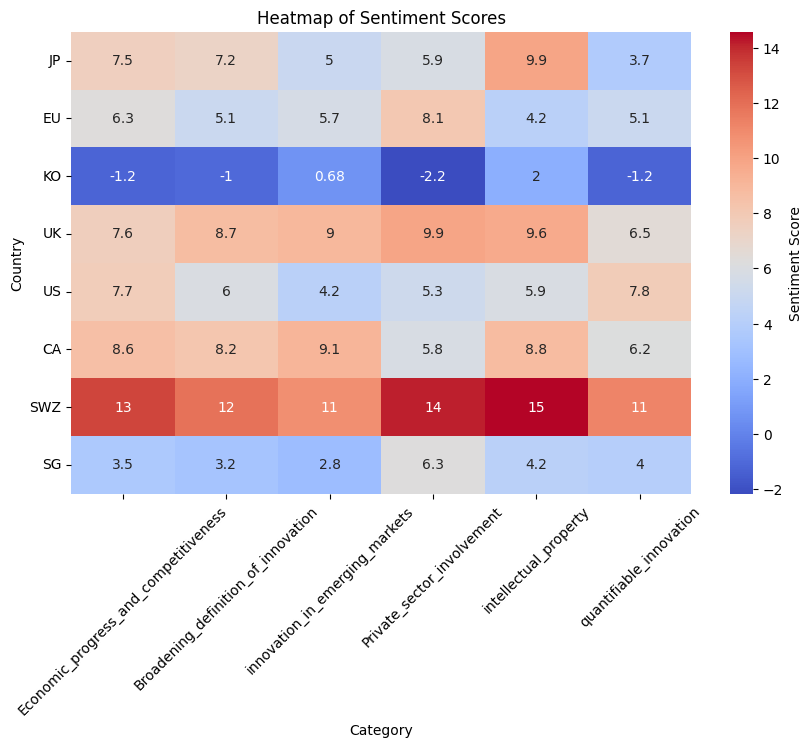

In [118]:
import seaborn as sns

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='coolwarm', cbar_kws={'label': 'Sentiment Score'})

plt.title('Heatmap of Sentiment Scores')
plt.ylabel('Country')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)  # Keep the country names horizontal for readability
plt.show()


In [114]:
df = df.drop('KO') # insufficient data, one small pdf
df = df.drop('JP') # insufficient data, one small pdf

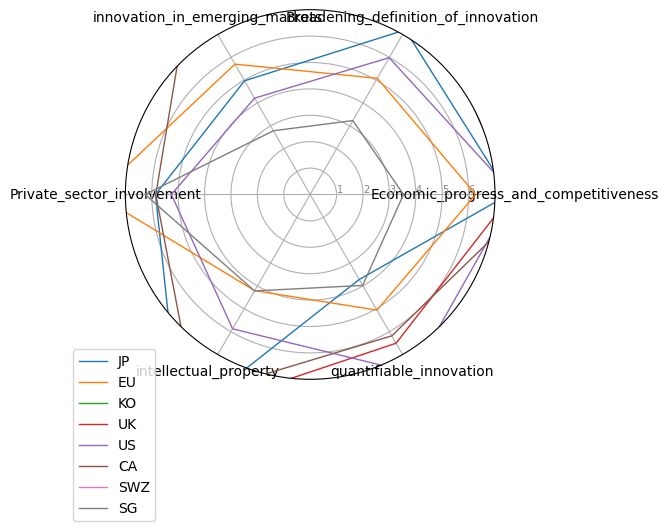

In [117]:
from math import pi

# Number of variables we're plotting
categories = list(df.columns)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variables)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Ensure the plot is closed

# Initialise the radar plot
fig, ax = plt.subplots(subplot_kw={'polar': True})

# Draw one axis per variable and add labels
plt.xticks(angles[:-1], categories)

# Draw y-labels
ax.set_rlabel_position(0)
plt.yticks([1,2,3,4,5,6], ["1","2","3","4","5","6"], color="grey", size=7)
plt.ylim(0,7)

# Plot each individual line
for index, row in df.iterrows():
    values = row.tolist()
    values += values[:1]  # Repeat the first value to close the circle
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=index)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


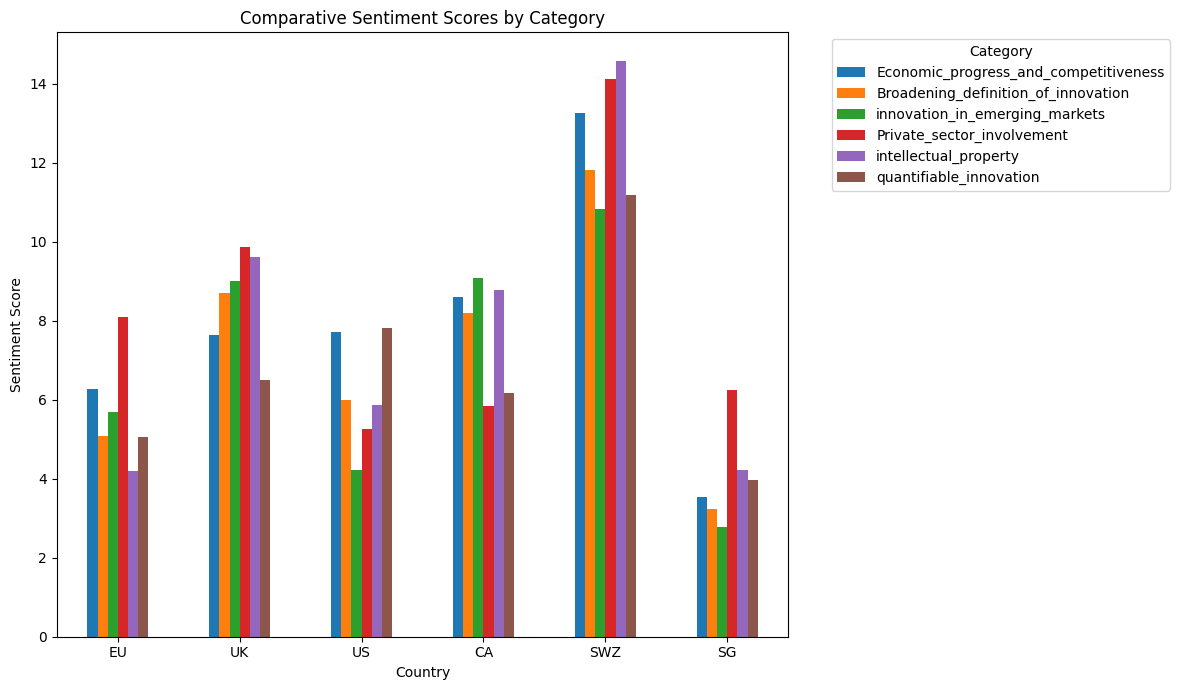

In [115]:
import matplotlib.pyplot as plt

# Transpose the DataFrame for easier plotting
df.plot(kind='bar', figsize=(12, 7))

plt.title('Comparative Sentiment Scores by Category')
plt.ylabel('Sentiment Score')
plt.xlabel('Country')
plt.xticks(rotation=0)  # Keep the country names horizontal for readability
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


In [130]:
# Assuming 'df' is your DataFrame
# Rank the scores in descending order, so that 1 corresponds to the highest score
df_ranked = df.rank(ascending=False, method='min', axis=1)

# Now 'df_ranked' contains the rankings of the scores within each country


In [131]:
df_ranked

,Economic_progress_and_competitiveness,Broadening_definition_of_innovation,innovation_in_emerging_markets,Private_sector_involvement,intellectual_property,quantifiable_innovation
JP,2.0,3.0,5.0,4.0,1.0,6.0
CA,3.0,4.0,1.0,6.0,2.0,5.0
KO,4.0,3.0,2.0,6.0,1.0,4.0
UK,5.0,4.0,3.0,1.0,2.0,6.0
US,2.0,3.0,6.0,5.0,4.0,1.0
EU,2.0,4.0,3.0,1.0,6.0,5.0
SWZ,3.0,4.0,6.0,2.0,1.0,5.0
SG,4.0,5.0,6.0,1.0,2.0,3.0


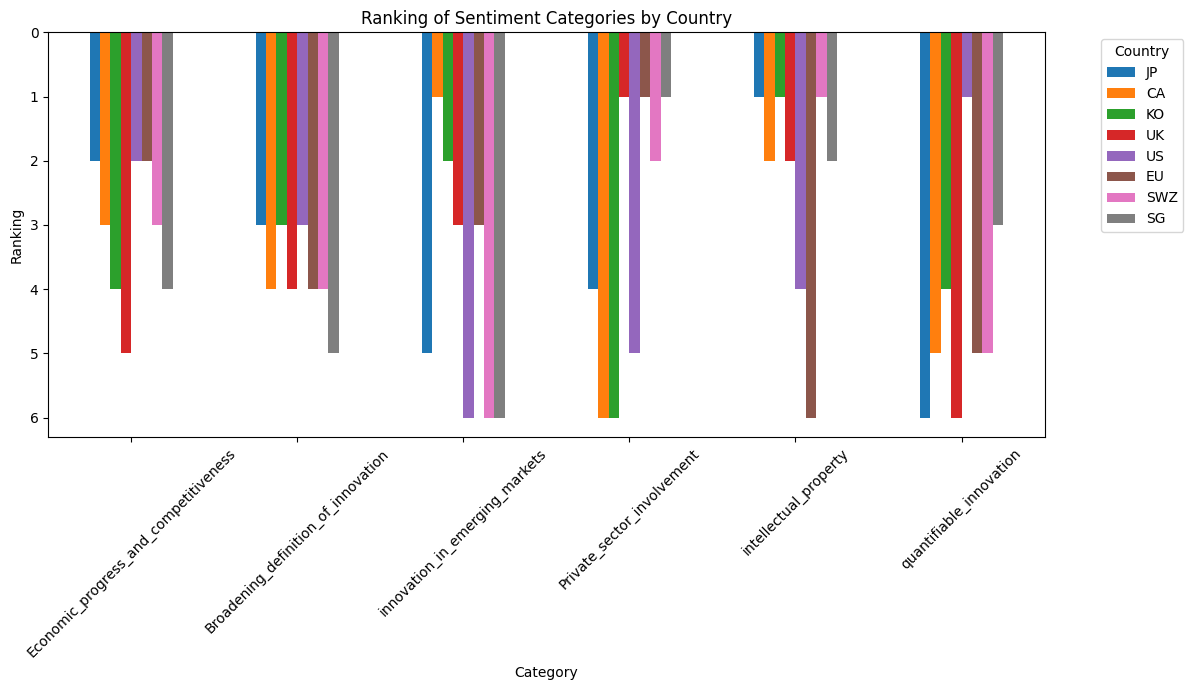

In [132]:
# Transpose the DataFrame for easier plotting
df_ranked.T.plot(kind='bar', figsize=(12, 7))

plt.title('Ranking of Sentiment Categories by Country')
plt.ylabel('Ranking')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest rank (1) at the top
plt.tight_layout()
plt.show()


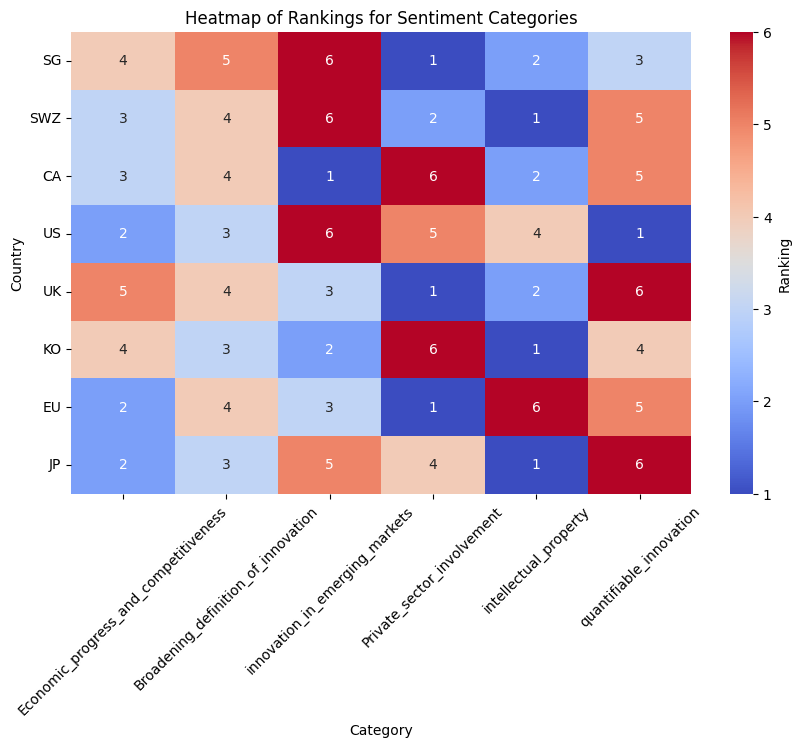

In [122]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_ranked, annot=True, cmap='coolwarm', cbar_kws={'label': 'Ranking'})

plt.title('Heatmap of Rankings for Sentiment Categories')
plt.ylabel('Country')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest rank (1) at the top
plt.show()


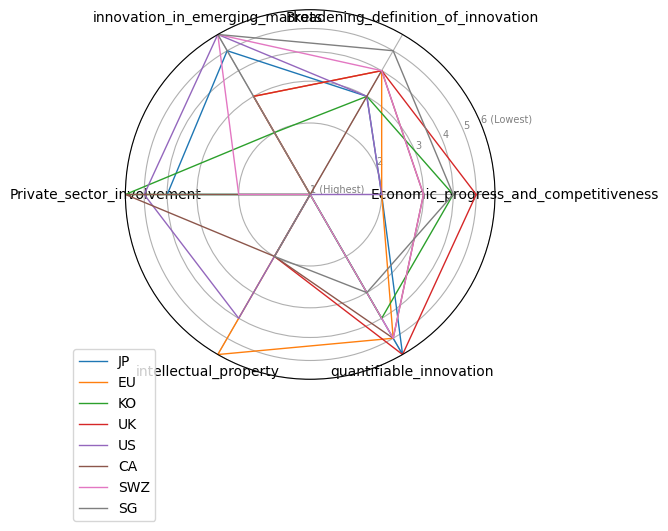

In [125]:
from math import pi

# Number of variables we're plotting
categories = list(df_ranked.columns)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variables)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the radar plot
fig, ax = plt.subplots(subplot_kw={'polar': True})

# Draw one axis per variable and add labels
plt.xticks(angles[:-1], categories)

# Draw y-labels and invert the scale so that 1 appears at the center
ax.set_rscale('log')
plt.yticks([1,2,3,4,5,6], ["1 (Highest)","2","3","4","5","6 (Lowest)"], color="grey", size=7)
plt.ylim(1,6)

# Plot each individual line
for index, row in df_ranked.iterrows():
    values = row.tolist()
    values += values[:1]  # Repeat the first value to close the circle
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=index)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


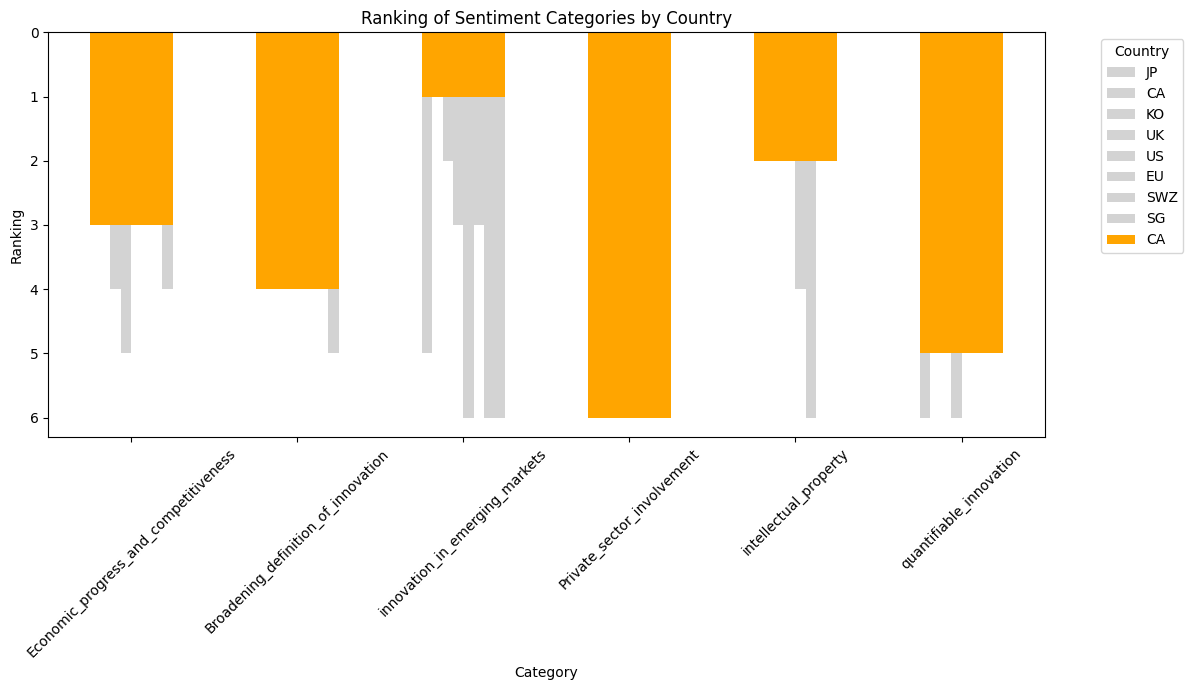

In [133]:
# Plot all countries first
df_ranked.T.plot(kind='bar', figsize=(12, 7), color='lightgrey')

# Now re-plot just the Canadian data on top
df_ranked.T['CA'].plot(kind='bar', color='orange')

plt.title('Ranking of Sentiment Categories by Country')
plt.ylabel('Ranking')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest rank (1) at the top
plt.tight_layout()
plt.show()
